<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.3

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:

house_hold_csv =pd.read_csv("../DATA/Family_Income_and_Expenditure.csv")
house_hold_csv
# Read CSV

Total Household Income              Region  Total Food Expenditure  \
0                      480332                 CAR                  117848   
1                      198235                 CAR                   67766   
2                       82785                 CAR                   61609   
3                      107589                 CAR                   78189   
4                      189322                 CAR                   94625   
...                       ...                 ...                     ...   
41539                  119773  XII - SOCCSKSARGEN                   44875   
41540                  137320  XII - SOCCSKSARGEN                   31157   
41541                  133171  XII - SOCCSKSARGEN                   45882   
41542                  129500  XII - SOCCSKSARGEN                   81416   
41543                  128598  XII - SOCCSKSARGEN                   78195   

            Main Source of Income  Agricultural Household indicator  \
0                   Wage/Salaries                                 0   
1                   Wage/Salaries                                 0   
2                   Wage/Salaries                                 1   
3                   Wage/Salaries                                 0   
4                   Wage/Salaries                                 0   
...                           ...                               ...   
41539  Enterpreneurial Activities                                 1   
41540  Enterpreneurial Activities                                 1   
41541  Enterpreneurial Activities                                 2   
41542  Enterpreneurial Activities                                 1   
41543  Enterpreneurial Activities                                 1   

       Bread and Cereals Expenditure  Total Rice Expenditure  \
0                              42140                   38300   
1                              17329                   13008   
2                              34182                   32001   
3                              34030                   28659   
4                              34820                   30167   
...                              ...                     ...   
41539                          23675                   21542   
41540                           2691                    1273   
41541                          28646                   27339   
41542                          29996                   26655   
41543                          43485                   41205   

       Meat Expenditure  Total Fish and  marine products Expenditure  \
0                 24676                                        16806   
1                 17434                                        11073   
2                  7783                                         2590   
3                 10914                                        10812   
4                 18391                                        11309   
...                 ...                                          ...   
41539              1476                                         6120   
41540              1886                                         4386   
41541               480                                         4796   
41542              2359                                        17730   
41543              1985                                         7735   

       Fruit Expenditure  ...  Number of Refrigerator/Freezer  \
0                   3325  ...                               1   
1                   2035  ...                               0   
2                   1730  ...                               0   
3                    690  ...                               0   
4                   1395  ...                               1   
...                  ...  ...                             ...   
41539               1632  ...                               0   
41540               1840  ...                               0   
41541     

In [4]:
# Head
house_hold_csv.head()

Total Household Income Region  Total Food Expenditure  \
0                  480332    CAR                  117848   
1                  198235    CAR                   67766   
2                   82785    CAR                   61609   
3                  107589    CAR                   78189   
4                  189322    CAR                   94625   

  Main Source of Income  Agricultural Household indicator  \
0         Wage/Salaries                                 0   
1         Wage/Salaries                                 0   
2         Wage/Salaries                                 1   
3         Wage/Salaries                                 0   
4         Wage/Salaries                                 0   

   Bread and Cereals Expenditure  Total Rice Expenditure  Meat Expenditure  \
0                          42140                   38300             24676   
1                          17329                   13008             17434   
2                          34182                   32001              7783   
3                          34030                   28659             10914   
4                          34820                   30167             18391   

   Total Fish and  marine products Expenditure  Fruit Expenditure  ...  \
0                                        16806               3325  ...   
1                                        11073               2035  ...   
2                                         2590               1730  ...   
3                                        10812                690  ...   
4                                        11309               1395  ...   

   Number of Refrigerator/Freezer  Number of Washing Machine  \
0                               1                          1   
1                               0                          1   
2                               0                          0   
3                               0                          0   
4                               1                          0   

   Number of Airconditioner  Number of Car, Jeep, Van  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Number of Landline/wireless telephones  Number of Cellular phone  \
0                                       0                         2   
1                                       0                         3   
2                                       0                         0   
3                                       0                         1   
4                                       0                         3   

   Number of Personal Computer  Number of Stove with Oven/Gas Range  \
0                            1                                    0   
1                            1                                    0   
2                            0                                    0   
3                            0                                    0   
4                            0                                    0   

   Number of Motorized Banca  Number of Motorcycle/Tricycle  
0                          0                              1  
1                          0                              2  
2                          0                              0  
3                          0                              0  
4                          0                              1  

[5 rows x 60 columns]

In [5]:
# Tail
house_hold_csv.tail()

Total Household Income              Region  Total Food Expenditure  \
41539                  119773  XII - SOCCSKSARGEN                   44875   
41540                  137320  XII - SOCCSKSARGEN                   31157   
41541                  133171  XII - SOCCSKSARGEN                   45882   
41542                  129500  XII - SOCCSKSARGEN                   81416   
41543                  128598  XII - SOCCSKSARGEN                   78195   

            Main Source of Income  Agricultural Household indicator  \
41539  Enterpreneurial Activities                                 1   
41540  Enterpreneurial Activities                                 1   
41541  Enterpreneurial Activities                                 2   
41542  Enterpreneurial Activities                                 1   
41543  Enterpreneurial Activities                                 1   

       Bread and Cereals Expenditure  Total Rice Expenditure  \
41539                          23675                   21542   
41540                           2691                    1273   
41541                          28646                   27339   
41542                          29996                   26655   
41543                          43485                   41205   

       Meat Expenditure  Total Fish and  marine products Expenditure  \
41539              1476                                         6120   
41540              1886                                         4386   
41541               480                                         4796   
41542              2359                                        17730   
41543              1985                                         7735   

       Fruit Expenditure  ...  Number of Refrigerator/Freezer  \
41539               1632  ...                               0   
41540               1840  ...                               0   
41541               1232  ...                               0   
41542               2923  ...                               0   
41543               2062  ...                               0   

       Number of Washing Machine  Number of Airconditioner  \
41539                          0                         0   
41540                          0                         0   
41541                          0                         0   
41542                          0                         0   
41543                          0                         0   

       Number of Car, Jeep, Van  Number of Landline/wireless telephones  \
41539                         0                                       0   
41540                         0                                       0   
41541                         0                                       0   
41542                         0                                       0   
41543                         0                                       0   

       Number of Cellular phone  Number of Personal Computer  \
41539                         1                            0   
41540                         3                            0   
41541                         1                            0   
41542                         2                            0   
41543                         1                            0   

       Number of Stove with Oven/Gas Range  Number of Motorized Banca  \
41539                                    0                          0   
41540                                    0                          0   
41541                                    0                          0   
41542                                    0                          0   
41543                                    0                          0   

       Number of Motorcycle/Tricycle  
41539                              0  
41540                              0  
41541                              0  
41542                              0  
41543                              0  

[5 rows x 60 columns]

In [10]:
# Shape
np.shape(house_hold_csv)

(41544, 60)

In [11]:
# Data Types
type(house_hold_csv)

pandas.core.frame.DataFrame

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

(array([4.1042e+04, 4.2600e+02, 5.1000e+01, 1.3000e+01, 4.0000e+00,
        5.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([1.12850000e+04, 1.19175530e+06, 2.37222560e+06, 3.55269590e+06,
        4.73316620e+06, 5.91363650e+06, 7.09410680e+06, 8.27457710e+06,
        9.45504740e+06, 1.06355177e+07, 1.18159880e+07]),
 <BarContainer object of 10 artists>)

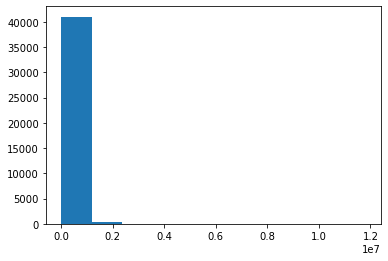

In [17]:
# ANSWER
plt.hist(house_hold_csv['Total Household Income'])

##### 2. How would you describe the shape of this population?

**ANSWER:**

##### 2. What is the mean income of this population?

In [18]:
# ANSWER
house_hold_csv['Total Household Income'].mean()

247555.58480165608

##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

**ANSWER:**

#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5. 

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [33]:
sample1 = house_hold_csv['Total Household Income']
sample1

0        480332
1        198235
2         82785
3        107589
4        189322
          ...  
41539    119773
41540    137320
41541    133171
41542    129500
41543    128598
Name: Total Household Income, Length: 41544, dtype: int64

In [37]:
# ANSWER
#sample size = 5
#no. of samples = 10

import random
from numpy.random import randint


In [40]:
sample_list = []

for i in range(50): # 50 times - we generate a 1000 of 0-1000random - 
    rand_list = np.random.randint(0,1000, 1000)
    # generates a list of 1000 elements with values 0-1000
    sample_list.append(sum(rand_list)/50) # sum all elements

In [ ]:
import random

# Creating a population replace with your own: 
population = [random.randint(0, 1000) for x in range(1000)]

# Creating the list to store all the means of each sample: 
means = []

for x in range(1000):
    # Creating a random sample of the population with size 50: 
    sample = random.sample(population,50)
    # Getting the sum of values in the sample then dividing by 50: 
    mean = sum(sample)/50
    # Adding this mean to the list of means
    means.append(mean)

In [72]:
means = []

population = [random.randint(0, 1000) for x in range(1000)]
for x in range(10):
    sample = random.sample(population,50)
    mean = sum(sample)/50
    print(mean)

475.86
417.64
493.46
498.64
429.08
471.32
600.86
501.86
520.54
513.04


In [8]:
s1 = (house_hold_csv.sample(5)).mean()
s1

Total Household Income                           215543.8
Total Food Expenditure                            70202.0
Agricultural Household indicator                      0.4
Bread and Cereals Expenditure                     17791.4
Total Rice Expenditure                            13834.6
Meat Expenditure                                  10859.0
Total Fish and  marine products Expenditure        7874.2
Fruit Expenditure                                  1651.0
Vegetables Expenditure                             3637.0
Restaurant and hotels Expenditure                 21899.0
Alcoholic Beverages Expenditure                     315.6
Tobacco Expenditure                                1324.4
Clothing, Footwear and Other Wear Expenditure      4325.6
Housing and water Expenditure                     41350.8
Imputed House Rental Value                        23760.0
Medical Care Expenditure                           1374.8
Transportation Expenditure                        11370.0
Communication 

Total Household Income                           156894.8
Total Food Expenditure                            75224.6
Agricultural Household indicator                      1.2
Bread and Cereals Expenditure                     24400.4
Total Rice Expenditure                            18789.8
Meat Expenditure                                  13978.8
Total Fish and  marine products Expenditure        5674.8
Fruit Expenditure                                  2308.0
Vegetables Expenditure                             3195.4
Restaurant and hotels Expenditure                  7141.0
Alcoholic Beverages Expenditure                    2122.0
Tobacco Expenditure                                1073.2
Clothing, Footwear and Other Wear Expenditure      5022.0
Housing and water Expenditure                     34707.6
Imputed House Rental Value                        17880.0
Medical Care Expenditure                           3661.2
Transportation Expenditure                         6694.8
Communication 

(array([41.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([     0.  ,  35428.14,  70856.28, 106284.42, 141712.56, 177140.7 ,
        212568.84, 247996.98, 283425.12, 318853.26, 354281.4 ]),
 <BarContainer object of 10 artists>)

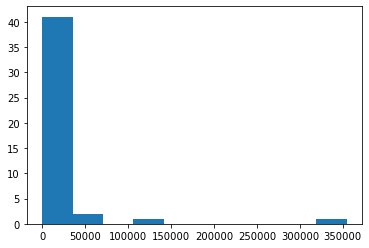

In [9]:
means = []

for i in range (10):
    s1 = (house_hold_csv.sample(5)).mean()
    print(s1)
plt.hist(s1)


###### 4.A Make a histogram of all the sample means

In [ ]:
# ANSWER


###### 4.B Describe the shape of the histogram.

**ANSWER:**

##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

Total Household Income                           196847.533333
Total Food Expenditure                            72343.533333
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     25833.733333
Total Rice Expenditure                            18366.400000
Meat Expenditure                                   6678.133333
Total Fish and  marine products Expenditure        9066.133333
Fruit Expenditure                                  2002.400000
Vegetables Expenditure                             4526.000000
Restaurant and hotels Expenditure                 12637.333333
Alcoholic Beverages Expenditure                    1080.866667
Tobacco Expenditure                                3004.933333
Clothing, Footwear and Other Wear Expenditure      3831.133333
Housing and water Expenditure                     32255.200000
Imputed House Rental Value                        16440.000000
Medical Care Expenditure                           3891

dtype: float64
Total Household Income                           154326.000000
Total Food Expenditure                            65394.666667
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     21418.266667
Total Rice Expenditure                            16769.066667
Meat Expenditure                                   8194.733333
Total Fish and  marine products Expenditure        9069.733333
Fruit Expenditure                                  1752.066667
Vegetables Expenditure                             4140.533333
Restaurant and hotels Expenditure                  8980.866667
Alcoholic Beverages Expenditure                    1849.800000
Tobacco Expenditure                                4317.066667
Clothing, Footwear and Other Wear Expenditure      3167.200000
Housing and water Expenditure                     19423.200000
Imputed House Rental Value                        10160.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           275173.733333
Total Food Expenditure                           104506.466667
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     26099.400000
Total Rice Expenditure                            17381.400000
Meat Expenditure                                  15237.400000
Total Fish and  marine products Expenditure       13444.066667
Fruit Expenditure                                  4277.800000
Vegetables Expenditure                             7352.466667
Restaurant and hotels Expenditure                 15512.933333
Alcoholic Beverages Expenditure                    1057.400000
Tobacco Expenditure                                3581.600000
Clothing, Footwear and Other Wear Expenditure      8296.133333
Housing and water Expenditure                     40574.400000
Imputed House Rental Value                        21360.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           223160.333333
Total Food Expenditure                            78500.600000
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     22854.466667
Total Rice Expenditure                            17179.600000
Meat Expenditure                                   9386.000000
Total Fish and  marine products Expenditure       11115.200000
Fruit Expenditure                                  2753.800000
Vegetables Expenditure                             5610.066667
Restaurant and hotels Expenditure                 14209.000000
Alcoholic Beverages Expenditure                     563.400000
Tobacco Expenditure                                3026.533333
Clothing, Footwear and Other Wear Expenditure      3041.600000
Housing and water Expenditure                     27083.600000
Imputed House Rental Value                        16480.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           282782.133333
Total Food Expenditure                            88597.800000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     25390.733333
Total Rice Expenditure                            18197.733333
Meat Expenditure                                  12129.066667
Total Fish and  marine products Expenditure       10328.066667
Fruit Expenditure                                  2413.333333
Vegetables Expenditure                             4212.933333
Restaurant and hotels Expenditure                 19171.466667
Alcoholic Beverages Expenditure                     709.866667
Tobacco Expenditure                                3845.333333
Clothing, Footwear and Other Wear Expenditure      5409.000000
Housing and water Expenditure                     49052.000000
Imputed House Rental Value                        31040.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           199275.800000
Total Food Expenditure                            75335.266667
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     21853.600000
Total Rice Expenditure                            17015.933333
Meat Expenditure                                   9289.266667
Total Fish and  marine products Expenditure        7970.000000
Fruit Expenditure                                  2578.600000
Vegetables Expenditure                             4650.666667
Restaurant and hotels Expenditure                 13013.266667
Alcoholic Beverages Expenditure                     550.066667
Tobacco Expenditure                                1636.800000
Clothing, Footwear and Other Wear Expenditure      3470.133333
Housing and water Expenditure                     31442.800000
Imputed House Rental Value                        20520.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           226219.800000
Total Food Expenditure                            89174.466667
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     26918.600000
Total Rice Expenditure                            19724.066667
Meat Expenditure                                   7613.933333
Total Fish and  marine products Expenditure       11998.600000
Fruit Expenditure                                  2597.533333
Vegetables Expenditure                             4618.133333
Restaurant and hotels Expenditure                 19597.666667
Alcoholic Beverages Expenditure                    2018.266667
Tobacco Expenditure                                1921.866667
Clothing, Footwear and Other Wear Expenditure      4687.333333
Housing and water Expenditure                     32179.200000
Imputed House Rental Value                        18600.000000
Medical Care Expenditure                

Total Household Income                           223848.200000
Total Food Expenditure                            95620.800000
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     36199.400000
Total Rice Expenditure                            28033.666667
Meat Expenditure                                   8889.333333
Total Fish and  marine products Expenditure       10831.466667
Fruit Expenditure                                  2459.800000
Vegetables Expenditure                             6323.866667
Restaurant and hotels Expenditure                 11042.133333
Alcoholic Beverages Expenditure                     738.533333
Tobacco Expenditure                                4299.600000
Clothing, Footwear and Other Wear Expenditure      5403.800000
Housing and water Expenditure                     36907.600000
Imputed House Rental Value                        17300.000000
Medical Care Expenditure                          11449

dtype: float64
Total Household Income                           320423.400000
Total Food Expenditure                            72853.733333
Agricultural Household indicator                      0.666667
Bread and Cereals Expenditure                     22342.200000
Total Rice Expenditure                            16546.066667
Meat Expenditure                                   6699.266667
Total Fish and  marine products Expenditure        8807.533333
Fruit Expenditure                                  2619.000000
Vegetables Expenditure                             4485.000000
Restaurant and hotels Expenditure                 14537.733333
Alcoholic Beverages Expenditure                    1282.000000
Tobacco Expenditure                                1416.200000
Clothing, Footwear and Other Wear Expenditure      6292.200000
Housing and water Expenditure                     53040.400000
Imputed House Rental Value                        33640.000000
Medical Care Expenditure                

Total Household Income                           403282.333333
Total Food Expenditure                           123766.666667
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     29896.266667
Total Rice Expenditure                            20747.200000
Meat Expenditure                                  17130.800000
Total Fish and  marine products Expenditure       15883.466667
Fruit Expenditure                                  2927.066667
Vegetables Expenditure                             8789.933333
Restaurant and hotels Expenditure                 22053.133333
Alcoholic Beverages Expenditure                    2684.200000
Tobacco Expenditure                                5082.000000
Clothing, Footwear and Other Wear Expenditure      8388.466667
Housing and water Expenditure                     55765.600000
Imputed House Rental Value                        33040.000000
Medical Care Expenditure                           6659

Total Household Income                           219743.733333
Total Food Expenditure                            74753.533333
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     24126.866667
Total Rice Expenditure                            17597.533333
Meat Expenditure                                   8411.866667
Total Fish and  marine products Expenditure       10367.533333
Fruit Expenditure                                  1682.533333
Vegetables Expenditure                             5667.733333
Restaurant and hotels Expenditure                  8630.600000
Alcoholic Beverages Expenditure                    1637.133333
Tobacco Expenditure                                 953.266667
Clothing, Footwear and Other Wear Expenditure      2532.400000
Housing and water Expenditure                     28550.800000
Imputed House Rental Value                        14960.000000
Medical Care Expenditure                          10841

Total Household Income                           189018.200000
Total Food Expenditure                            81368.466667
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     25564.533333
Total Rice Expenditure                            19233.133333
Meat Expenditure                                   9795.200000
Total Fish and  marine products Expenditure       11778.266667
Fruit Expenditure                                  2218.533333
Vegetables Expenditure                             4664.733333
Restaurant and hotels Expenditure                 13250.266667
Alcoholic Beverages Expenditure                    1450.533333
Tobacco Expenditure                                2595.600000
Clothing, Footwear and Other Wear Expenditure      3947.533333
Housing and water Expenditure                     32576.400000
Imputed House Rental Value                        18980.000000
Medical Care Expenditure                           4054

Total Household Income                           190286.466667
Total Food Expenditure                            84032.666667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     26210.266667
Total Rice Expenditure                            19643.200000
Meat Expenditure                                   9843.800000
Total Fish and  marine products Expenditure       10415.333333
Fruit Expenditure                                  1976.733333
Vegetables Expenditure                             5324.533333
Restaurant and hotels Expenditure                 12815.666667
Alcoholic Beverages Expenditure                     863.600000
Tobacco Expenditure                                2380.266667
Clothing, Footwear and Other Wear Expenditure      3433.933333
Housing and water Expenditure                     33734.800000
Imputed House Rental Value                        19420.000000
Medical Care Expenditure                           4224

dtype: float64
Total Household Income                           152803.533333
Total Food Expenditure                            64994.800000
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     22880.600000
Total Rice Expenditure                            17132.400000
Meat Expenditure                                   7964.000000
Total Fish and  marine products Expenditure        7206.066667
Fruit Expenditure                                  2128.666667
Vegetables Expenditure                             4441.533333
Restaurant and hotels Expenditure                  9829.733333
Alcoholic Beverages Expenditure                    1199.466667
Tobacco Expenditure                                1266.333333
Clothing, Footwear and Other Wear Expenditure      3768.066667
Housing and water Expenditure                     23616.000000
Imputed House Rental Value                        12480.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           257735.533333
Total Food Expenditure                            88294.666667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     26836.733333
Total Rice Expenditure                            18108.000000
Meat Expenditure                                  10893.600000
Total Fish and  marine products Expenditure       11537.333333
Fruit Expenditure                                  2510.266667
Vegetables Expenditure                             4797.866667
Restaurant and hotels Expenditure                 14786.600000
Alcoholic Beverages Expenditure                    1234.066667
Tobacco Expenditure                                2739.733333
Clothing, Footwear and Other Wear Expenditure      3777.533333
Housing and water Expenditure                     31058.000000
Imputed House Rental Value                        17120.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           254843.266667
Total Food Expenditure                            86799.133333
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     24677.133333
Total Rice Expenditure                            19068.000000
Meat Expenditure                                   8343.266667
Total Fish and  marine products Expenditure       12563.133333
Fruit Expenditure                                  2966.000000
Vegetables Expenditure                             5315.400000
Restaurant and hotels Expenditure                 15556.133333
Alcoholic Beverages Expenditure                     668.133333
Tobacco Expenditure                                3472.133333
Clothing, Footwear and Other Wear Expenditure      7238.733333
Housing and water Expenditure                     34948.400000
Imputed House Rental Value                        20240.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           190823.866667
Total Food Expenditure                            70615.200000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     28026.400000
Total Rice Expenditure                            19626.466667
Meat Expenditure                                   7329.133333
Total Fish and  marine products Expenditure       10345.066667
Fruit Expenditure                                  2122.333333
Vegetables Expenditure                             5756.266667
Restaurant and hotels Expenditure                  6325.933333
Alcoholic Beverages Expenditure                     859.333333
Tobacco Expenditure                                1983.200000
Clothing, Footwear and Other Wear Expenditure      4788.533333
Housing and water Expenditure                     23280.000000
Imputed House Rental Value                        12500.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           250457.333333
Total Food Expenditure                            81499.800000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     26099.066667
Total Rice Expenditure                            17775.400000
Meat Expenditure                                  10434.333333
Total Fish and  marine products Expenditure        9869.933333
Fruit Expenditure                                  3240.666667
Vegetables Expenditure                             4358.000000
Restaurant and hotels Expenditure                 11971.800000
Alcoholic Beverages Expenditure                    1316.200000
Tobacco Expenditure                                3816.333333
Clothing, Footwear and Other Wear Expenditure      7777.600000
Housing and water Expenditure                     35378.400000
Imputed House Rental Value                        23720.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           256702.400000
Total Food Expenditure                            89819.333333
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     23284.266667
Total Rice Expenditure                            16152.933333
Meat Expenditure                                  12463.066667
Total Fish and  marine products Expenditure       10690.733333
Fruit Expenditure                                  3179.000000
Vegetables Expenditure                             6046.333333
Restaurant and hotels Expenditure                 15970.400000
Alcoholic Beverages Expenditure                    1224.000000
Tobacco Expenditure                                1907.466667
Clothing, Footwear and Other Wear Expenditure      5755.933333
Housing and water Expenditure                     38954.400000
Imputed House Rental Value                        23960.000000
Medical Care Expenditure                

Total Household Income                           184069.066667
Total Food Expenditure                            68757.800000
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     23193.800000
Total Rice Expenditure                            16912.866667
Meat Expenditure                                   8942.000000
Total Fish and  marine products Expenditure        7759.533333
Fruit Expenditure                                  2128.666667
Vegetables Expenditure                             3802.133333
Restaurant and hotels Expenditure                 11255.333333
Alcoholic Beverages Expenditure                     815.333333
Tobacco Expenditure                                2221.333333
Clothing, Footwear and Other Wear Expenditure      4842.000000
Housing and water Expenditure                     27684.800000
Imputed House Rental Value                        17360.000000
Medical Care Expenditure                           6793

Total Household Income                           177154.400000
Total Food Expenditure                            71297.266667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     17007.066667
Total Rice Expenditure                            11663.800000
Meat Expenditure                                   7329.733333
Total Fish and  marine products Expenditure        6957.200000
Fruit Expenditure                                  2360.466667
Vegetables Expenditure                             4743.800000
Restaurant and hotels Expenditure                 20022.200000
Alcoholic Beverages Expenditure                    1192.800000
Tobacco Expenditure                                2136.266667
Clothing, Footwear and Other Wear Expenditure      3732.533333
Housing and water Expenditure                     21530.800000
Imputed House Rental Value                        10360.000000
Medical Care Expenditure                           8677

Total Household Income                           319131.533333
Total Food Expenditure                            96965.733333
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     22521.533333
Total Rice Expenditure                            16112.933333
Meat Expenditure                                  11908.133333
Total Fish and  marine products Expenditure       12421.066667
Fruit Expenditure                                  2111.666667
Vegetables Expenditure                             5289.400000
Restaurant and hotels Expenditure                 25644.600000
Alcoholic Beverages Expenditure                    1471.666667
Tobacco Expenditure                                 557.733333
Clothing, Footwear and Other Wear Expenditure      6256.400000
Housing and water Expenditure                     54188.000000
Imputed House Rental Value                        30240.000000
Medical Care Expenditure                          14621

dtype: float64
Total Household Income                           262386.000000
Total Food Expenditure                            85690.866667
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     28536.400000
Total Rice Expenditure                            22432.200000
Meat Expenditure                                  12433.333333
Total Fish and  marine products Expenditure       10886.866667
Fruit Expenditure                                  2624.866667
Vegetables Expenditure                             4584.733333
Restaurant and hotels Expenditure                 11968.866667
Alcoholic Beverages Expenditure                    1211.800000
Tobacco Expenditure                                2860.533333
Clothing, Footwear and Other Wear Expenditure      4233.666667
Housing and water Expenditure                     40829.600000
Imputed House Rental Value                        24840.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           234317.133333
Total Food Expenditure                            81889.466667
Agricultural Household indicator                      0.200000
Bread and Cereals Expenditure                     23366.266667
Total Rice Expenditure                            17613.733333
Meat Expenditure                                  10866.133333
Total Fish and  marine products Expenditure       10914.133333
Fruit Expenditure                                  1713.800000
Vegetables Expenditure                             5020.200000
Restaurant and hotels Expenditure                 15390.400000
Alcoholic Beverages Expenditure                     449.600000
Tobacco Expenditure                                1569.400000
Clothing, Footwear and Other Wear Expenditure      5741.133333
Housing and water Expenditure                     40133.200000
Imputed House Rental Value                        21380.000000
Medical Care Expenditure                

Total Household Income                           328483.800000
Total Food Expenditure                            93136.200000
Agricultural Household indicator                      0.800000
Bread and Cereals Expenditure                     27557.866667
Total Rice Expenditure                            17527.533333
Meat Expenditure                                  12106.066667
Total Fish and  marine products Expenditure        9831.133333
Fruit Expenditure                                  2577.600000
Vegetables Expenditure                             5966.733333
Restaurant and hotels Expenditure                 22618.466667
Alcoholic Beverages Expenditure                     510.133333
Tobacco Expenditure                                1392.066667
Clothing, Footwear and Other Wear Expenditure      5465.066667
Housing and water Expenditure                     73438.000000
Imputed House Rental Value                        35940.000000
Medical Care Expenditure                          17357

Total Household Income                           313295.333333
Total Food Expenditure                           103166.200000
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     25515.666667
Total Rice Expenditure                            18939.600000
Meat Expenditure                                  13915.000000
Total Fish and  marine products Expenditure       12704.933333
Fruit Expenditure                                  3405.800000
Vegetables Expenditure                             6233.133333
Restaurant and hotels Expenditure                 23091.133333
Alcoholic Beverages Expenditure                     792.666667
Tobacco Expenditure                                 870.400000
Clothing, Footwear and Other Wear Expenditure      6973.600000
Housing and water Expenditure                     47479.200000
Imputed House Rental Value                        25520.000000
Medical Care Expenditure                          13853

dtype: float64
Total Household Income                           152937.000000
Total Food Expenditure                            73881.733333
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     22730.533333
Total Rice Expenditure                            15777.000000
Meat Expenditure                                   6246.733333
Total Fish and  marine products Expenditure       14782.333333
Fruit Expenditure                                  2355.266667
Vegetables Expenditure                             5446.266667
Restaurant and hotels Expenditure                  7316.666667
Alcoholic Beverages Expenditure                    1107.533333
Tobacco Expenditure                                2280.733333
Clothing, Footwear and Other Wear Expenditure      2932.600000
Housing and water Expenditure                     26250.000000
Imputed House Rental Value                        14300.000000
Medical Care Expenditure                

Total Household Income                           123952.733333
Total Food Expenditure                            57793.066667
Agricultural Household indicator                      0.933333
Bread and Cereals Expenditure                     24298.866667
Total Rice Expenditure                            19987.000000
Meat Expenditure                                   4769.600000
Total Fish and  marine products Expenditure        6934.866667
Fruit Expenditure                                  1015.333333
Vegetables Expenditure                             3756.533333
Restaurant and hotels Expenditure                  6566.866667
Alcoholic Beverages Expenditure                    1578.533333
Tobacco Expenditure                                3420.466667
Clothing, Footwear and Other Wear Expenditure      1795.600000
Housing and water Expenditure                     20575.200000
Imputed House Rental Value                        12180.000000
Medical Care Expenditure                           4823

dtype: float64
Total Household Income                           208882.400000
Total Food Expenditure                            83561.933333
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     26380.600000
Total Rice Expenditure                            20364.600000
Meat Expenditure                                   8549.200000
Total Fish and  marine products Expenditure       10701.800000
Fruit Expenditure                                  2694.266667
Vegetables Expenditure                             4423.600000
Restaurant and hotels Expenditure                 13156.133333
Alcoholic Beverages Expenditure                    1030.400000
Tobacco Expenditure                                5509.066667
Clothing, Footwear and Other Wear Expenditure      4509.466667
Housing and water Expenditure                     32191.600000
Imputed House Rental Value                        18160.000000
Medical Care Expenditure                

Total Household Income                           201915.533333
Total Food Expenditure                            78769.000000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     27322.666667
Total Rice Expenditure                            21515.800000
Meat Expenditure                                   9148.866667
Total Fish and  marine products Expenditure       10102.400000
Fruit Expenditure                                  2230.400000
Vegetables Expenditure                             5099.000000
Restaurant and hotels Expenditure                 10987.133333
Alcoholic Beverages Expenditure                    1129.933333
Tobacco Expenditure                                1591.666667
Clothing, Footwear and Other Wear Expenditure      3381.200000
Housing and water Expenditure                     31744.800000
Imputed House Rental Value                        17100.000000
Medical Care Expenditure                           1781

Total Household Income                           386385.466667
Total Food Expenditure                           121223.333333
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     34264.133333
Total Rice Expenditure                            21879.933333
Meat Expenditure                                  14585.200000
Total Fish and  marine products Expenditure       11364.000000
Fruit Expenditure                                  4403.000000
Vegetables Expenditure                             5465.733333
Restaurant and hotels Expenditure                 24831.400000
Alcoholic Beverages Expenditure                    1552.266667
Tobacco Expenditure                                2287.200000
Clothing, Footwear and Other Wear Expenditure      7524.400000
Housing and water Expenditure                     61938.400000
Imputed House Rental Value                        36720.000000
Medical Care Expenditure                           8546

Total Household Income                           281795.533333
Total Food Expenditure                            85151.466667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     24171.000000
Total Rice Expenditure                            17661.800000
Meat Expenditure                                  10850.533333
Total Fish and  marine products Expenditure       13144.533333
Fruit Expenditure                                  2991.266667
Vegetables Expenditure                             6456.800000
Restaurant and hotels Expenditure                 12540.000000
Alcoholic Beverages Expenditure                    1738.066667
Tobacco Expenditure                                1532.333333
Clothing, Footwear and Other Wear Expenditure      3390.800000
Housing and water Expenditure                     36972.400000
Imputed House Rental Value                        19520.000000
Medical Care Expenditure                          13019

dtype: float64
Total Household Income                           238334.333333
Total Food Expenditure                            98878.733333
Agricultural Household indicator                      0.733333
Bread and Cereals Expenditure                     29077.666667
Total Rice Expenditure                            22176.066667
Meat Expenditure                                  11147.800000
Total Fish and  marine products Expenditure       13662.733333
Fruit Expenditure                                  2375.600000
Vegetables Expenditure                             5982.266667
Restaurant and hotels Expenditure                 16304.533333
Alcoholic Beverages Expenditure                    1785.400000
Tobacco Expenditure                                3553.000000
Clothing, Footwear and Other Wear Expenditure      4352.733333
Housing and water Expenditure                     35210.400000
Imputed House Rental Value                        14540.000000
Medical Care Expenditure                

Total Household Income                           189261.266667
Total Food Expenditure                            65661.333333
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     23518.266667
Total Rice Expenditure                            18297.266667
Meat Expenditure                                   8173.866667
Total Fish and  marine products Expenditure        8121.000000
Fruit Expenditure                                  1975.133333
Vegetables Expenditure                             4130.400000
Restaurant and hotels Expenditure                  6928.666667
Alcoholic Beverages Expenditure                     589.933333
Tobacco Expenditure                                 875.200000
Clothing, Footwear and Other Wear Expenditure      4067.666667
Housing and water Expenditure                     29906.800000
Imputed House Rental Value                        17600.000000
Medical Care Expenditure                           1665

dtype: float64
Total Household Income                           261067.533333
Total Food Expenditure                            95507.533333
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     28412.066667
Total Rice Expenditure                            19229.333333
Meat Expenditure                                  10316.866667
Total Fish and  marine products Expenditure       10236.000000
Fruit Expenditure                                  2761.533333
Vegetables Expenditure                             5783.000000
Restaurant and hotels Expenditure                 17755.666667
Alcoholic Beverages Expenditure                     980.133333
Tobacco Expenditure                                2216.066667
Clothing, Footwear and Other Wear Expenditure      6659.333333
Housing and water Expenditure                     42212.800000
Imputed House Rental Value                        22540.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           203129.266667
Total Food Expenditure                            82704.200000
Agricultural Household indicator                      0.666667
Bread and Cereals Expenditure                     31846.800000
Total Rice Expenditure                            22135.666667
Meat Expenditure                                   9474.466667
Total Fish and  marine products Expenditure        9973.933333
Fruit Expenditure                                  2312.533333
Vegetables Expenditure                             5530.200000
Restaurant and hotels Expenditure                  5376.400000
Alcoholic Beverages Expenditure                    2742.466667
Tobacco Expenditure                                3000.000000
Clothing, Footwear and Other Wear Expenditure      3717.666667
Housing and water Expenditure                     25301.600000
Imputed House Rental Value                        12260.000000
Medical Care Expenditure                

Total Household Income                           284373.733333
Total Food Expenditure                            79906.466667
Agricultural Household indicator                      0.666667
Bread and Cereals Expenditure                     24563.600000
Total Rice Expenditure                            17709.733333
Meat Expenditure                                   8704.400000
Total Fish and  marine products Expenditure        9214.533333
Fruit Expenditure                                  2636.333333
Vegetables Expenditure                             7193.533333
Restaurant and hotels Expenditure                 12898.600000
Alcoholic Beverages Expenditure                    2131.000000
Tobacco Expenditure                                8079.866667
Clothing, Footwear and Other Wear Expenditure      3614.133333
Housing and water Expenditure                     43988.800000
Imputed House Rental Value                        27820.000000
Medical Care Expenditure                          37041

dtype: float64
Total Household Income                           212040.800000
Total Food Expenditure                            94906.200000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     28792.333333
Total Rice Expenditure                            21251.000000
Meat Expenditure                                  13559.400000
Total Fish and  marine products Expenditure       12417.800000
Fruit Expenditure                                  2481.333333
Vegetables Expenditure                             5488.600000
Restaurant and hotels Expenditure                 12433.466667
Alcoholic Beverages Expenditure                    1741.866667
Tobacco Expenditure                                2517.133333
Clothing, Footwear and Other Wear Expenditure      3750.733333
Housing and water Expenditure                     34934.000000
Imputed House Rental Value                        15480.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           289794.333333
Total Food Expenditure                            79091.800000
Agricultural Household indicator                      0.200000
Bread and Cereals Expenditure                     23322.266667
Total Rice Expenditure                            16777.200000
Meat Expenditure                                  10720.933333
Total Fish and  marine products Expenditure       13707.133333
Fruit Expenditure                                  2051.466667
Vegetables Expenditure                             4447.133333
Restaurant and hotels Expenditure                  9915.200000
Alcoholic Beverages Expenditure                     604.533333
Tobacco Expenditure                                2408.800000
Clothing, Footwear and Other Wear Expenditure      6321.266667
Housing and water Expenditure                     36196.400000
Imputed House Rental Value                        21900.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           199505.466667
Total Food Expenditure                            92176.666667
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     29882.466667
Total Rice Expenditure                            21563.133333
Meat Expenditure                                  12101.000000
Total Fish and  marine products Expenditure       10033.733333
Fruit Expenditure                                  2407.466667
Vegetables Expenditure                             4302.266667
Restaurant and hotels Expenditure                 15636.466667
Alcoholic Beverages Expenditure                    1029.000000
Tobacco Expenditure                                3582.000000
Clothing, Footwear and Other Wear Expenditure      3469.666667
Housing and water Expenditure                     32891.600000
Imputed House Rental Value                        19880.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           245207.733333
Total Food Expenditure                            77716.533333
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     21629.800000
Total Rice Expenditure                            14177.466667
Meat Expenditure                                   9717.866667
Total Fish and  marine products Expenditure        9461.666667
Fruit Expenditure                                  2725.933333
Vegetables Expenditure                             5722.933333
Restaurant and hotels Expenditure                 12529.266667
Alcoholic Beverages Expenditure                     930.866667
Tobacco Expenditure                                1335.400000
Clothing, Footwear and Other Wear Expenditure      4520.266667
Housing and water Expenditure                     48399.600000
Imputed House Rental Value                        28760.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           224544.600000
Total Food Expenditure                            80267.733333
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     22152.133333
Total Rice Expenditure                            16255.000000
Meat Expenditure                                  13393.133333
Total Fish and  marine products Expenditure        8414.933333
Fruit Expenditure                                  3458.466667
Vegetables Expenditure                             6276.200000
Restaurant and hotels Expenditure                 10349.266667
Alcoholic Beverages Expenditure                     872.466667
Tobacco Expenditure                                 381.933333
Clothing, Footwear and Other Wear Expenditure      6504.333333
Housing and water Expenditure                     29395.200000
Imputed House Rental Value                        17660.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           345030.933333
Total Food Expenditure                           103249.200000
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     27874.466667
Total Rice Expenditure                            18945.600000
Meat Expenditure                                  12784.333333
Total Fish and  marine products Expenditure       12305.000000
Fruit Expenditure                                  3067.533333
Vegetables Expenditure                             6984.266667
Restaurant and hotels Expenditure                 17002.800000
Alcoholic Beverages Expenditure                    1031.866667
Tobacco Expenditure                                2305.666667
Clothing, Footwear and Other Wear Expenditure      4782.800000
Housing and water Expenditure                     39223.200000
Imputed House Rental Value                        21320.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           239381.733333
Total Food Expenditure                            92991.000000
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     22562.666667
Total Rice Expenditure                            14505.933333
Meat Expenditure                                  13478.533333
Total Fish and  marine products Expenditure       10551.200000
Fruit Expenditure                                  4349.466667
Vegetables Expenditure                             6963.200000
Restaurant and hotels Expenditure                 17607.533333
Alcoholic Beverages Expenditure                    1137.400000
Tobacco Expenditure                                3662.600000
Clothing, Footwear and Other Wear Expenditure      5053.600000
Housing and water Expenditure                     26562.000000
Imputed House Rental Value                         8200.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           217574.266667
Total Food Expenditure                            79334.600000
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     25181.933333
Total Rice Expenditure                            18602.600000
Meat Expenditure                                   8484.933333
Total Fish and  marine products Expenditure       10280.466667
Fruit Expenditure                                  2387.866667
Vegetables Expenditure                             5298.133333
Restaurant and hotels Expenditure                 12994.266667
Alcoholic Beverages Expenditure                     708.000000
Tobacco Expenditure                                1604.800000
Clothing, Footwear and Other Wear Expenditure      3996.066667
Housing and water Expenditure                     27652.400000
Imputed House Rental Value                        15080.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           182207.600000
Total Food Expenditure                            68431.733333
Agricultural Household indicator                      0.866667
Bread and Cereals Expenditure                     22019.533333
Total Rice Expenditure                            16801.600000
Meat Expenditure                                   8502.933333
Total Fish and  marine products Expenditure       10254.066667
Fruit Expenditure                                  2006.266667
Vegetables Expenditure                             4718.866667
Restaurant and hotels Expenditure                 10455.333333
Alcoholic Beverages Expenditure                     550.400000
Tobacco Expenditure                                 619.866667
Clothing, Footwear and Other Wear Expenditure      4746.200000
Housing and water Expenditure                     41231.200000
Imputed House Rental Value                        25560.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           168533.066667
Total Food Expenditure                            68507.200000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     21729.733333
Total Rice Expenditure                            14721.133333
Meat Expenditure                                   7490.533333
Total Fish and  marine products Expenditure        8563.133333
Fruit Expenditure                                  2139.600000
Vegetables Expenditure                             4779.266667
Restaurant and hotels Expenditure                  8483.200000
Alcoholic Beverages Expenditure                    1472.800000
Tobacco Expenditure                                2956.266667
Clothing, Footwear and Other Wear Expenditure      2560.333333
Housing and water Expenditure                     28014.800000
Imputed House Rental Value                        12840.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           326054.333333
Total Food Expenditure                            95183.333333
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     24760.666667
Total Rice Expenditure                            17740.533333
Meat Expenditure                                   9437.400000
Total Fish and  marine products Expenditure       11135.000000
Fruit Expenditure                                  3053.733333
Vegetables Expenditure                             3785.666667
Restaurant and hotels Expenditure                 20980.000000
Alcoholic Beverages Expenditure                     481.866667
Tobacco Expenditure                                2091.266667
Clothing, Footwear and Other Wear Expenditure      4567.333333
Housing and water Expenditure                     76526.800000
Imputed House Rental Value                        28120.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           183910.533333
Total Food Expenditure                            82399.200000
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     24472.800000
Total Rice Expenditure                            18301.533333
Meat Expenditure                                  10801.400000
Total Fish and  marine products Expenditure        7838.600000
Fruit Expenditure                                  5326.933333
Vegetables Expenditure                             5034.400000
Restaurant and hotels Expenditure                 15444.000000
Alcoholic Beverages Expenditure                     844.133333
Tobacco Expenditure                                1185.933333
Clothing, Footwear and Other Wear Expenditure      3046.266667
Housing and water Expenditure                     35458.000000
Imputed House Rental Value                        21660.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           195519.266667
Total Food Expenditure                            76236.666667
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     27331.066667
Total Rice Expenditure                            19654.933333
Meat Expenditure                                   9184.933333
Total Fish and  marine products Expenditure        8835.200000
Fruit Expenditure                                  2648.533333
Vegetables Expenditure                             4328.600000
Restaurant and hotels Expenditure                  8973.000000
Alcoholic Beverages Expenditure                     146.866667
Tobacco Expenditure                                 460.666667
Clothing, Footwear and Other Wear Expenditure      3431.533333
Housing and water Expenditure                     40274.800000
Imputed House Rental Value                        23440.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           316142.066667
Total Food Expenditure                            90511.400000
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     24243.666667
Total Rice Expenditure                            16054.200000
Meat Expenditure                                  11781.866667
Total Fish and  marine products Expenditure       10190.933333
Fruit Expenditure                                  2714.733333
Vegetables Expenditure                             4546.266667
Restaurant and hotels Expenditure                 19451.533333
Alcoholic Beverages Expenditure                    1268.333333
Tobacco Expenditure                                2636.066667
Clothing, Footwear and Other Wear Expenditure      6926.466667
Housing and water Expenditure                     39736.400000
Imputed House Rental Value                        17560.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           174043.666667
Total Food Expenditure                            74614.800000
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     28789.800000
Total Rice Expenditure                            20088.600000
Meat Expenditure                                   7914.866667
Total Fish and  marine products Expenditure       12648.066667
Fruit Expenditure                                  1584.066667
Vegetables Expenditure                             3916.400000
Restaurant and hotels Expenditure                  9913.333333
Alcoholic Beverages Expenditure                     852.333333
Tobacco Expenditure                                1390.133333
Clothing, Footwear and Other Wear Expenditure      3596.733333
Housing and water Expenditure                     28777.600000
Imputed House Rental Value                        16700.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           449996.533333
Total Food Expenditure                           107389.200000
Agricultural Household indicator                      0.733333
Bread and Cereals Expenditure                     24639.800000
Total Rice Expenditure                            16388.866667
Meat Expenditure                                  15822.266667
Total Fish and  marine products Expenditure       14859.933333
Fruit Expenditure                                  3289.066667
Vegetables Expenditure                             5338.866667
Restaurant and hotels Expenditure                 25789.600000
Alcoholic Beverages Expenditure                    1015.400000
Tobacco Expenditure                                2942.800000
Clothing, Footwear and Other Wear Expenditure     10514.733333
Housing and water Expenditure                     66687.200000
Imputed House Rental Value                        38240.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           281289.066667
Total Food Expenditure                            87035.266667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     24490.400000
Total Rice Expenditure                            17768.800000
Meat Expenditure                                  11947.800000
Total Fish and  marine products Expenditure        9654.400000
Fruit Expenditure                                  2745.066667
Vegetables Expenditure                             4705.600000
Restaurant and hotels Expenditure                 17162.733333
Alcoholic Beverages Expenditure                    1631.066667
Tobacco Expenditure                                 522.800000
Clothing, Footwear and Other Wear Expenditure      7409.200000
Housing and water Expenditure                     45125.200000
Imputed House Rental Value                        26760.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           207200.466667
Total Food Expenditure                            71653.866667
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     26140.000000
Total Rice Expenditure                            21225.333333
Meat Expenditure                                   8765.000000
Total Fish and  marine products Expenditure        9383.000000
Fruit Expenditure                                  2377.133333
Vegetables Expenditure                             5895.866667
Restaurant and hotels Expenditure                  7918.933333
Alcoholic Beverages Expenditure                     491.200000
Tobacco Expenditure                                2282.200000
Clothing, Footwear and Other Wear Expenditure      5071.466667
Housing and water Expenditure                     33068.800000
Imputed House Rental Value                        20060.000000
Medical Care Expenditure                

Total Household Income                           186458.133333
Total Food Expenditure                            85930.066667
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     22672.066667
Total Rice Expenditure                            15215.533333
Meat Expenditure                                   9668.200000
Total Fish and  marine products Expenditure        8718.333333
Fruit Expenditure                                  2127.333333
Vegetables Expenditure                             4687.466667
Restaurant and hotels Expenditure                 18107.333333
Alcoholic Beverages Expenditure                    1947.666667
Tobacco Expenditure                                3564.533333
Clothing, Footwear and Other Wear Expenditure      3773.333333
Housing and water Expenditure                     19639.600000
Imputed House Rental Value                         8080.000000
Medical Care Expenditure                           1771

Total Household Income                           239259.333333
Total Food Expenditure                            92835.400000
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     28319.600000
Total Rice Expenditure                            20098.933333
Meat Expenditure                                  10790.933333
Total Fish and  marine products Expenditure       11096.200000
Fruit Expenditure                                  2589.466667
Vegetables Expenditure                             5081.533333
Restaurant and hotels Expenditure                 14380.266667
Alcoholic Beverages Expenditure                     724.866667
Tobacco Expenditure                                3039.400000
Clothing, Footwear and Other Wear Expenditure      7169.533333
Housing and water Expenditure                     45764.000000
Imputed House Rental Value                        22220.000000
Medical Care Expenditure                           5932

dtype: float64
Total Household Income                           174751.733333
Total Food Expenditure                            71557.400000
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     22347.400000
Total Rice Expenditure                            15976.733333
Meat Expenditure                                   8707.333333
Total Fish and  marine products Expenditure        8364.133333
Fruit Expenditure                                  1798.200000
Vegetables Expenditure                             4678.400000
Restaurant and hotels Expenditure                 10581.000000
Alcoholic Beverages Expenditure                     366.400000
Tobacco Expenditure                                1612.800000
Clothing, Footwear and Other Wear Expenditure      3279.066667
Housing and water Expenditure                     28317.200000
Imputed House Rental Value                        16040.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           215348.666667
Total Food Expenditure                            75858.200000
Agricultural Household indicator                      0.400000
Bread and Cereals Expenditure                     19126.333333
Total Rice Expenditure                            14165.666667
Meat Expenditure                                  11213.933333
Total Fish and  marine products Expenditure        8980.200000
Fruit Expenditure                                  2423.266667
Vegetables Expenditure                             4243.800000
Restaurant and hotels Expenditure                 15812.933333
Alcoholic Beverages Expenditure                    1598.466667
Tobacco Expenditure                                2437.066667
Clothing, Footwear and Other Wear Expenditure      5017.066667
Housing and water Expenditure                     35557.200000
Imputed House Rental Value                        21820.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           188741.133333
Total Food Expenditure                            70420.266667
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     22428.733333
Total Rice Expenditure                            16371.600000
Meat Expenditure                                   8559.066667
Total Fish and  marine products Expenditure        8290.466667
Fruit Expenditure                                  1491.400000
Vegetables Expenditure                             3396.000000
Restaurant and hotels Expenditure                 14666.200000
Alcoholic Beverages Expenditure                    1537.733333
Tobacco Expenditure                                3137.133333
Clothing, Footwear and Other Wear Expenditure      4105.266667
Housing and water Expenditure                     21489.200000
Imputed House Rental Value                        10760.000000
Medical Care Expenditure                

Total Household Income                           256296.600000
Total Food Expenditure                            79837.533333
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     27592.600000
Total Rice Expenditure                            20740.466667
Meat Expenditure                                   8925.600000
Total Fish and  marine products Expenditure       11554.200000
Fruit Expenditure                                  1788.800000
Vegetables Expenditure                             4921.266667
Restaurant and hotels Expenditure                  8722.133333
Alcoholic Beverages Expenditure                     787.600000
Tobacco Expenditure                                2288.133333
Clothing, Footwear and Other Wear Expenditure      3644.000000
Housing and water Expenditure                     39761.600000
Imputed House Rental Value                        26460.000000
Medical Care Expenditure                           5567

dtype: float64
Total Household Income                           209608.133333
Total Food Expenditure                            76453.466667
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     22001.200000
Total Rice Expenditure                            16148.666667
Meat Expenditure                                   9152.866667
Total Fish and  marine products Expenditure       11314.933333
Fruit Expenditure                                  2042.733333
Vegetables Expenditure                             4266.266667
Restaurant and hotels Expenditure                 13882.333333
Alcoholic Beverages Expenditure                     843.466667
Tobacco Expenditure                                1998.333333
Clothing, Footwear and Other Wear Expenditure      3531.800000
Housing and water Expenditure                     35299.200000
Imputed House Rental Value                        21640.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           262730.133333
Total Food Expenditure                           112326.600000
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     28770.266667
Total Rice Expenditure                            17562.400000
Meat Expenditure                                  16042.466667
Total Fish and  marine products Expenditure       12704.400000
Fruit Expenditure                                  5117.066667
Vegetables Expenditure                             7141.000000
Restaurant and hotels Expenditure                 19593.333333
Alcoholic Beverages Expenditure                     407.333333
Tobacco Expenditure                                2336.666667
Clothing, Footwear and Other Wear Expenditure      7707.733333
Housing and water Expenditure                     37954.800000
Imputed House Rental Value                        18160.000000
Medical Care Expenditure                

dtype: float64
Total Household Income                           206725.400000
Total Food Expenditure                            69510.533333
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     22496.333333
Total Rice Expenditure                            16958.266667
Meat Expenditure                                   8031.866667
Total Fish and  marine products Expenditure        8248.733333
Fruit Expenditure                                  2889.000000
Vegetables Expenditure                             4402.533333
Restaurant and hotels Expenditure                  9650.133333
Alcoholic Beverages Expenditure                     849.266667
Tobacco Expenditure                                1585.400000
Clothing, Footwear and Other Wear Expenditure      4756.200000
Housing and water Expenditure                     37319.600000
Imputed House Rental Value                        24000.000000
Medical Care Expenditure                

Total Household Income                           204555.400000
Total Food Expenditure                            86666.866667
Agricultural Household indicator                      0.533333
Bread and Cereals Expenditure                     31262.733333
Total Rice Expenditure                            17586.266667
Meat Expenditure                                  10035.933333
Total Fish and  marine products Expenditure        8595.933333
Fruit Expenditure                                  2780.333333
Vegetables Expenditure                             4229.933333
Restaurant and hotels Expenditure                 14556.800000
Alcoholic Beverages Expenditure                    1480.800000
Tobacco Expenditure                                2064.000000
Clothing, Footwear and Other Wear Expenditure      3362.200000
Housing and water Expenditure                     26518.400000
Imputed House Rental Value                        13760.000000
Medical Care Expenditure                           8062

dtype: float64
Total Household Income                           229572.866667
Total Food Expenditure                            94323.000000
Agricultural Household indicator                      0.133333
Bread and Cereals Expenditure                     26118.600000
Total Rice Expenditure                            17292.200000
Meat Expenditure                                  10950.733333
Total Fish and  marine products Expenditure       10274.533333
Fruit Expenditure                                  3935.933333
Vegetables Expenditure                             6277.400000
Restaurant and hotels Expenditure                 18738.466667
Alcoholic Beverages Expenditure                     731.933333
Tobacco Expenditure                                1185.200000
Clothing, Footwear and Other Wear Expenditure      6691.466667
Housing and water Expenditure                     42049.600000
Imputed House Rental Value                        24800.000000
Medical Care Expenditure                

Total Household Income                           284660.866667
Total Food Expenditure                            98106.666667
Agricultural Household indicator                      0.466667
Bread and Cereals Expenditure                     26213.400000
Total Rice Expenditure                            18845.200000
Meat Expenditure                                  15430.533333
Total Fish and  marine products Expenditure       12487.600000
Fruit Expenditure                                  5594.333333
Vegetables Expenditure                             3803.200000
Restaurant and hotels Expenditure                 20871.333333
Alcoholic Beverages Expenditure                    1296.000000
Tobacco Expenditure                                1493.866667
Clothing, Footwear and Other Wear Expenditure      5048.666667
Housing and water Expenditure                     38132.400000
Imputed House Rental Value                        17080.000000
Medical Care Expenditure                           2771

Total Household Income                           272110.933333
Total Food Expenditure                           102695.600000
Agricultural Household indicator                      0.600000
Bread and Cereals Expenditure                     27688.600000
Total Rice Expenditure                            19687.933333
Meat Expenditure                                  15107.666667
Total Fish and  marine products Expenditure       10721.266667
Fruit Expenditure                                  3145.400000
Vegetables Expenditure                             7350.400000
Restaurant and hotels Expenditure                 16902.400000
Alcoholic Beverages Expenditure                    1974.400000
Tobacco Expenditure                                4010.200000
Clothing, Footwear and Other Wear Expenditure      4461.600000
Housing and water Expenditure                     39120.800000
Imputed House Rental Value                        16120.000000
Medical Care Expenditure                           4116

Total Household Income                           266684.866667
Total Food Expenditure                            88139.866667
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     25048.733333
Total Rice Expenditure                            16722.600000
Meat Expenditure                                  12042.800000
Total Fish and  marine products Expenditure       10670.266667
Fruit Expenditure                                  4329.266667
Vegetables Expenditure                             5300.200000
Restaurant and hotels Expenditure                 12275.933333
Alcoholic Beverages Expenditure                    1124.266667
Tobacco Expenditure                                3625.133333
Clothing, Footwear and Other Wear Expenditure     10621.133333
Housing and water Expenditure                     38377.600000
Imputed House Rental Value                        22440.000000
Medical Care Expenditure                           3574

dtype: float64
Total Household Income                           167353.866667
Total Food Expenditure                            74966.666667
Agricultural Household indicator                      0.266667
Bread and Cereals Expenditure                     24534.333333
Total Rice Expenditure                            17197.266667
Meat Expenditure                                   7713.466667
Total Fish and  marine products Expenditure       11835.800000
Fruit Expenditure                                  2027.133333
Vegetables Expenditure                             4951.933333
Restaurant and hotels Expenditure                  8313.333333
Alcoholic Beverages Expenditure                    1088.000000
Tobacco Expenditure                                3557.866667
Clothing, Footwear and Other Wear Expenditure      2413.133333
Housing and water Expenditure                     20935.600000
Imputed House Rental Value                        13380.000000
Medical Care Expenditure                

Total Household Income                           218547.933333
Total Food Expenditure                            79027.066667
Agricultural Household indicator                      0.333333
Bread and Cereals Expenditure                     24697.866667
Total Rice Expenditure                            18840.733333
Meat Expenditure                                   8420.733333
Total Fish and  marine products Expenditure       10896.400000
Fruit Expenditure                                  2044.733333
Vegetables Expenditure                             5332.800000
Restaurant and hotels Expenditure                 12426.600000
Alcoholic Beverages Expenditure                     566.733333
Tobacco Expenditure                                3632.733333
Clothing, Footwear and Other Wear Expenditure      3697.000000
Housing and water Expenditure                     40377.200000
Imputed House Rental Value                        25320.000000
Medical Care Expenditure                           8197

Total Household Income                           386060.466667
Total Food Expenditure                            91137.466667
Agricultural Household indicator                      0.066667
Bread and Cereals Expenditure                     24710.733333
Total Rice Expenditure                            18364.333333
Meat Expenditure                                  14741.400000
Total Fish and  marine products Expenditure       10508.733333
Fruit Expenditure                                  3217.533333
Vegetables Expenditure                             4881.466667
Restaurant and hotels Expenditure                 17981.400000
Alcoholic Beverages Expenditure                    2806.266667
Tobacco Expenditure                                1996.933333
Clothing, Footwear and Other Wear Expenditure      5053.333333
Housing and water Expenditure                     52434.400000
Imputed House Rental Value                        33280.000000
Medical Care Expenditure                           5730

dtype: float64
Total Household Income                           233443.933333
Total Food Expenditure                           104792.133333
Agricultural Household indicator                      0.066667
Bread and Cereals Expenditure                     33132.933333
Total Rice Expenditure                            24417.800000
Meat Expenditure                                  12012.400000
Total Fish and  marine products Expenditure       14121.133333
Fruit Expenditure                                  2074.000000
Vegetables Expenditure                             6458.600000
Restaurant and hotels Expenditure                 12351.933333
Alcoholic Beverages Expenditure                     573.800000
Tobacco Expenditure                                2144.666667
Clothing, Footwear and Other Wear Expenditure      5300.333333
Housing and water Expenditure                     33884.000000
Imputed House Rental Value                        14440.000000
Medical Care Expenditure                

(array([40.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([     0.  ,  24706.76,  49413.52,  74120.28,  98827.04, 123533.8 ,
        148240.56, 172947.32, 197654.08, 222360.84, 247067.6 ]),
 <BarContainer object of 10 artists>)

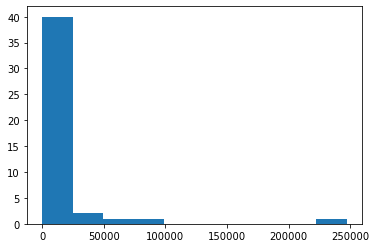

In [10]:
# ANSWER
for i in range (1000):
    s1 = (house_hold_csv.sample(15)).mean()
    print(s1)
plt.hist(s1)

##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

Total Household Income                           299655.24
Total Food Expenditure                            96328.94
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     24593.86
Total Rice Expenditure                            17490.70
Meat Expenditure                                  11681.60
Total Fish and  marine products Expenditure       12231.84
Fruit Expenditure                                  3206.14
Vegetables Expenditure                             5812.86
Restaurant and hotels Expenditure                 18399.96
Alcoholic Beverages Expenditure                     761.36
Tobacco Expenditure                                2026.78
Clothing, Footwear and Other Wear Expenditure      5527.64
Housing and water Expenditure                     49276.68
Imputed House Rental Value                        27312.00
Medical Care Expenditure                          12580.88
Transportation Expenditure                        14965.

dtype: float64
Total Household Income                           248182.98
Total Food Expenditure                            81073.72
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     22114.68
Total Rice Expenditure                            15665.02
Meat Expenditure                                  10845.02
Total Fish and  marine products Expenditure       10626.78
Fruit Expenditure                                  2047.06
Vegetables Expenditure                             4545.48
Restaurant and hotels Expenditure                 17060.12
Alcoholic Beverages Expenditure                     587.34
Tobacco Expenditure                                3015.06
Clothing, Footwear and Other Wear Expenditure      4710.22
Housing and water Expenditure                     33168.48
Imputed House Rental Value                        19374.00
Medical Care Expenditure                           3717.48
Transportation Expenditure               

dtype: float64
Total Household Income                           217894.68
Total Food Expenditure                            75323.82
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     23492.74
Total Rice Expenditure                            16665.76
Meat Expenditure                                   9495.22
Total Fish and  marine products Expenditure        9372.60
Fruit Expenditure                                  2158.20
Vegetables Expenditure                             4373.82
Restaurant and hotels Expenditure                 14071.44
Alcoholic Beverages Expenditure                     792.32
Tobacco Expenditure                                2142.54
Clothing, Footwear and Other Wear Expenditure      5203.88
Housing and water Expenditure                     38543.64
Imputed House Rental Value                        17862.00
Medical Care Expenditure                           4326.48
Transportation Expenditure               

dtype: float64
Total Household Income                           281592.06
Total Food Expenditure                           101175.84
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     31158.28
Total Rice Expenditure                            22506.88
Meat Expenditure                                  13879.66
Total Fish and  marine products Expenditure       11132.38
Fruit Expenditure                                  2647.76
Vegetables Expenditure                             5424.42
Restaurant and hotels Expenditure                 16314.68
Alcoholic Beverages Expenditure                    1162.58
Tobacco Expenditure                                3072.60
Clothing, Footwear and Other Wear Expenditure      4578.10
Housing and water Expenditure                     37968.60
Imputed House Rental Value                        16782.00
Medical Care Expenditure                          12343.40
Transportation Expenditure               

Total Household Income                           236519.40
Total Food Expenditure                            86137.48
Agricultural Household indicator                      0.46
Bread and Cereals Expenditure                     26285.84
Total Rice Expenditure                            18786.42
Meat Expenditure                                   9676.58
Total Fish and  marine products Expenditure       13848.06
Fruit Expenditure                                  2504.94
Vegetables Expenditure                             5107.98
Restaurant and hotels Expenditure                 14295.40
Alcoholic Beverages Expenditure                     749.28
Tobacco Expenditure                                1857.34
Clothing, Footwear and Other Wear Expenditure      5198.36
Housing and water Expenditure                     34156.44
Imputed House Rental Value                        15864.00
Medical Care Expenditure                           2324.90
Transportation Expenditure                        10672.

dtype: float64
Total Household Income                           246144.28
Total Food Expenditure                            91989.92
Agricultural Household indicator                      0.60
Bread and Cereals Expenditure                     27898.60
Total Rice Expenditure                            20659.20
Meat Expenditure                                  11118.74
Total Fish and  marine products Expenditure       11272.36
Fruit Expenditure                                  2669.98
Vegetables Expenditure                             5738.22
Restaurant and hotels Expenditure                 15926.78
Alcoholic Beverages Expenditure                    1407.34
Tobacco Expenditure                                2259.20
Clothing, Footwear and Other Wear Expenditure      4669.78
Housing and water Expenditure                     33854.76
Imputed House Rental Value                        17376.00
Medical Care Expenditure                           4948.54
Transportation Expenditure               

dtype: float64
Total Household Income                           203226.24
Total Food Expenditure                            79066.18
Agricultural Household indicator                      0.22
Bread and Cereals Expenditure                     22525.08
Total Rice Expenditure                            16958.60
Meat Expenditure                                   9726.12
Total Fish and  marine products Expenditure       10039.70
Fruit Expenditure                                  2567.66
Vegetables Expenditure                             4574.04
Restaurant and hotels Expenditure                 12766.56
Alcoholic Beverages Expenditure                    1241.18
Tobacco Expenditure                                2164.58
Clothing, Footwear and Other Wear Expenditure      4880.12
Housing and water Expenditure                     34807.56
Imputed House Rental Value                        19128.00
Medical Care Expenditure                           4468.98
Transportation Expenditure               

dtype: float64
Total Household Income                           279629.98
Total Food Expenditure                            92023.98
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     27548.28
Total Rice Expenditure                            19905.84
Meat Expenditure                                  10240.22
Total Fish and  marine products Expenditure       12579.74
Fruit Expenditure                                  2585.46
Vegetables Expenditure                             5538.32
Restaurant and hotels Expenditure                 16522.42
Alcoholic Beverages Expenditure                     618.14
Tobacco Expenditure                                2169.62
Clothing, Footwear and Other Wear Expenditure      5271.72
Housing and water Expenditure                     60309.60
Imputed House Rental Value                        42552.00
Medical Care Expenditure                          10187.74
Transportation Expenditure               

dtype: float64
Total Household Income                           203315.32
Total Food Expenditure                            78199.74
Agricultural Household indicator                      0.26
Bread and Cereals Expenditure                     23550.12
Total Rice Expenditure                            18121.38
Meat Expenditure                                  11478.44
Total Fish and  marine products Expenditure       10105.46
Fruit Expenditure                                  2412.58
Vegetables Expenditure                             5038.22
Restaurant and hotels Expenditure                 10603.22
Alcoholic Beverages Expenditure                     726.74
Tobacco Expenditure                                1452.56
Clothing, Footwear and Other Wear Expenditure      4112.48
Housing and water Expenditure                     33741.24
Imputed House Rental Value                        16092.00
Medical Care Expenditure                           4044.04
Transportation Expenditure               

dtype: float64
Total Household Income                           230670.94
Total Food Expenditure                            87509.10
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     25447.08
Total Rice Expenditure                            18361.18
Meat Expenditure                                  11306.04
Total Fish and  marine products Expenditure       11265.96
Fruit Expenditure                                  2888.54
Vegetables Expenditure                             5658.90
Restaurant and hotels Expenditure                 13886.96
Alcoholic Beverages Expenditure                    1053.60
Tobacco Expenditure                                2501.26
Clothing, Footwear and Other Wear Expenditure      5303.80
Housing and water Expenditure                     32396.28
Imputed House Rental Value                        16668.00
Medical Care Expenditure                           3307.04
Transportation Expenditure               

dtype: float64
Total Household Income                           272048.24
Total Food Expenditure                            87576.78
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     24466.74
Total Rice Expenditure                            18213.62
Meat Expenditure                                  10897.60
Total Fish and  marine products Expenditure       10684.46
Fruit Expenditure                                  2959.64
Vegetables Expenditure                             4824.06
Restaurant and hotels Expenditure                 14651.92
Alcoholic Beverages Expenditure                     914.56
Tobacco Expenditure                                2212.62
Clothing, Footwear and Other Wear Expenditure      5609.50
Housing and water Expenditure                     46921.08
Imputed House Rental Value                        29796.00
Medical Care Expenditure                           8696.40
Transportation Expenditure               

Total Household Income                           240530.26
Total Food Expenditure                            88008.58
Agricultural Household indicator                      0.54
Bread and Cereals Expenditure                     27727.72
Total Rice Expenditure                            20458.52
Meat Expenditure                                  10898.24
Total Fish and  marine products Expenditure       10311.20
Fruit Expenditure                                  3448.04
Vegetables Expenditure                             5318.84
Restaurant and hotels Expenditure                 13317.20
Alcoholic Beverages Expenditure                    1079.06
Tobacco Expenditure                                2182.96
Clothing, Footwear and Other Wear Expenditure      5979.78
Housing and water Expenditure                     37311.96
Imputed House Rental Value                        20322.00
Medical Care Expenditure                           6075.38
Transportation Expenditure                        10438.

Total Household Income                           432626.76
Total Food Expenditure                            88834.88
Agricultural Household indicator                      0.30
Bread and Cereals Expenditure                     25352.66
Total Rice Expenditure                            17385.26
Meat Expenditure                                  10690.94
Total Fish and  marine products Expenditure       11666.44
Fruit Expenditure                                  2692.50
Vegetables Expenditure                             5290.02
Restaurant and hotels Expenditure                 16579.62
Alcoholic Beverages Expenditure                     620.96
Tobacco Expenditure                                1989.96
Clothing, Footwear and Other Wear Expenditure      8245.94
Housing and water Expenditure                     49718.88
Imputed House Rental Value                        29568.00
Medical Care Expenditure                          12853.00
Transportation Expenditure                        12246.

Total Household Income                           228843.22
Total Food Expenditure                            81194.94
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     24960.08
Total Rice Expenditure                            17278.40
Meat Expenditure                                   9837.60
Total Fish and  marine products Expenditure        9998.14
Fruit Expenditure                                  2114.10
Vegetables Expenditure                             5186.06
Restaurant and hotels Expenditure                 14010.32
Alcoholic Beverages Expenditure                     942.48
Tobacco Expenditure                                2303.86
Clothing, Footwear and Other Wear Expenditure      4578.80
Housing and water Expenditure                     31081.08
Imputed House Rental Value                        15774.00
Medical Care Expenditure                           6492.84
Transportation Expenditure                        10941.

Total Household Income                           276756.44
Total Food Expenditure                            88236.96
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     25538.30
Total Rice Expenditure                            18539.86
Meat Expenditure                                  11727.46
Total Fish and  marine products Expenditure       11478.70
Fruit Expenditure                                  2706.20
Vegetables Expenditure                             4752.24
Restaurant and hotels Expenditure                 14893.46
Alcoholic Beverages Expenditure                     649.28
Tobacco Expenditure                                2942.04
Clothing, Footwear and Other Wear Expenditure      5476.20
Housing and water Expenditure                     37938.60
Imputed House Rental Value                        21054.00
Medical Care Expenditure                           5600.12
Transportation Expenditure                        10912.

dtype: float64
Total Household Income                           248094.76
Total Food Expenditure                            85791.94
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     23836.94
Total Rice Expenditure                            15697.68
Meat Expenditure                                  11197.34
Total Fish and  marine products Expenditure       10291.86
Fruit Expenditure                                  2851.10
Vegetables Expenditure                             4731.96
Restaurant and hotels Expenditure                 16944.10
Alcoholic Beverages Expenditure                    1114.72
Tobacco Expenditure                                2725.14
Clothing, Footwear and Other Wear Expenditure      6270.40
Housing and water Expenditure                     49011.60
Imputed House Rental Value                        28002.00
Medical Care Expenditure                           5445.42
Transportation Expenditure               

dtype: float64
Total Household Income                           240673.40
Total Food Expenditure                            79516.90
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     23571.64
Total Rice Expenditure                            16294.90
Meat Expenditure                                   9478.92
Total Fish and  marine products Expenditure       10250.88
Fruit Expenditure                                  2406.40
Vegetables Expenditure                             4801.46
Restaurant and hotels Expenditure                 12548.02
Alcoholic Beverages Expenditure                    1614.90
Tobacco Expenditure                                2181.38
Clothing, Footwear and Other Wear Expenditure      4993.92
Housing and water Expenditure                     34382.40
Imputed House Rental Value                        18198.00
Medical Care Expenditure                           7442.90
Transportation Expenditure               

dtype: float64
Total Household Income                           266596.90
Total Food Expenditure                            82603.02
Agricultural Household indicator                      0.52
Bread and Cereals Expenditure                     23674.98
Total Rice Expenditure                            16684.78
Meat Expenditure                                   9895.50
Total Fish and  marine products Expenditure        9837.12
Fruit Expenditure                                  2704.86
Vegetables Expenditure                             4818.98
Restaurant and hotels Expenditure                 15975.70
Alcoholic Beverages Expenditure                     869.96
Tobacco Expenditure                                2098.64
Clothing, Footwear and Other Wear Expenditure      5321.92
Housing and water Expenditure                     44359.32
Imputed House Rental Value                        24792.00
Medical Care Expenditure                          11380.68
Transportation Expenditure               

Total Household Income                           242056.10
Total Food Expenditure                            89538.04
Agricultural Household indicator                      0.52
Bread and Cereals Expenditure                     26077.92
Total Rice Expenditure                            19148.70
Meat Expenditure                                  14455.28
Total Fish and  marine products Expenditure       11835.14
Fruit Expenditure                                  2503.70
Vegetables Expenditure                             5092.58
Restaurant and hotels Expenditure                 12956.68
Alcoholic Beverages Expenditure                     864.22
Tobacco Expenditure                                1896.20
Clothing, Footwear and Other Wear Expenditure      5053.16
Housing and water Expenditure                     43781.76
Imputed House Rental Value                        26466.00
Medical Care Expenditure                           6963.46
Transportation Expenditure                        14406.

Total Household Income                           270169.38
Total Food Expenditure                            90323.92
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     26071.96
Total Rice Expenditure                            18754.28
Meat Expenditure                                  11306.40
Total Fish and  marine products Expenditure       11822.62
Fruit Expenditure                                  2491.28
Vegetables Expenditure                             6092.52
Restaurant and hotels Expenditure                 15802.74
Alcoholic Beverages Expenditure                    1281.48
Tobacco Expenditure                                2644.40
Clothing, Footwear and Other Wear Expenditure      5153.70
Housing and water Expenditure                     42809.64
Imputed House Rental Value                        22140.00
Medical Care Expenditure                           5535.66
Transportation Expenditure                        11615.

Total Household Income                           290300.16
Total Food Expenditure                            94820.58
Agricultural Household indicator                      0.58
Bread and Cereals Expenditure                     25625.68
Total Rice Expenditure                            18301.08
Meat Expenditure                                  10330.36
Total Fish and  marine products Expenditure       10357.24
Fruit Expenditure                                  2919.62
Vegetables Expenditure                             5363.98
Restaurant and hotels Expenditure                 22744.46
Alcoholic Beverages Expenditure                     867.64
Tobacco Expenditure                                2926.56
Clothing, Footwear and Other Wear Expenditure      5702.36
Housing and water Expenditure                     43848.12
Imputed House Rental Value                        24156.00
Medical Care Expenditure                           5875.24
Transportation Expenditure                        14103.

dtype: float64
Total Household Income                           249449.92
Total Food Expenditure                            82937.42
Agricultural Household indicator                      0.62
Bread and Cereals Expenditure                     26313.82
Total Rice Expenditure                            19632.16
Meat Expenditure                                  10904.30
Total Fish and  marine products Expenditure        8821.42
Fruit Expenditure                                  2243.50
Vegetables Expenditure                             5110.22
Restaurant and hotels Expenditure                 12746.18
Alcoholic Beverages Expenditure                    1002.76
Tobacco Expenditure                                2626.24
Clothing, Footwear and Other Wear Expenditure      4105.80
Housing and water Expenditure                     32019.00
Imputed House Rental Value                        15774.00
Medical Care Expenditure                           4832.16
Transportation Expenditure               

dtype: float64
Total Household Income                           289151.26
Total Food Expenditure                           100577.76
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     26081.42
Total Rice Expenditure                            18331.44
Meat Expenditure                                  15589.58
Total Fish and  marine products Expenditure       11765.78
Fruit Expenditure                                  2925.98
Vegetables Expenditure                             5359.16
Restaurant and hotels Expenditure                 19021.22
Alcoholic Beverages Expenditure                     825.22
Tobacco Expenditure                                3195.98
Clothing, Footwear and Other Wear Expenditure      4463.86
Housing and water Expenditure                     37400.76
Imputed House Rental Value                        19926.00
Medical Care Expenditure                          10396.88
Transportation Expenditure               

Total Household Income                           313689.68
Total Food Expenditure                            85374.12
Agricultural Household indicator                      0.46
Bread and Cereals Expenditure                     24300.18
Total Rice Expenditure                            18067.70
Meat Expenditure                                  10578.14
Total Fish and  marine products Expenditure       10615.58
Fruit Expenditure                                  2543.52
Vegetables Expenditure                             5032.68
Restaurant and hotels Expenditure                 17459.40
Alcoholic Beverages Expenditure                    1156.88
Tobacco Expenditure                                2600.14
Clothing, Footwear and Other Wear Expenditure      5531.58
Housing and water Expenditure                     53328.96
Imputed House Rental Value                        38856.00
Medical Care Expenditure                           7652.54
Transportation Expenditure                        12261.

dtype: float64
Total Household Income                           185798.70
Total Food Expenditure                            80641.00
Agricultural Household indicator                      0.26
Bread and Cereals Expenditure                     25741.82
Total Rice Expenditure                            17322.04
Meat Expenditure                                   9689.80
Total Fish and  marine products Expenditure       10851.44
Fruit Expenditure                                  1943.08
Vegetables Expenditure                             5559.16
Restaurant and hotels Expenditure                 11861.50
Alcoholic Beverages Expenditure                    1767.78
Tobacco Expenditure                                2515.50
Clothing, Footwear and Other Wear Expenditure      5249.66
Housing and water Expenditure                     28472.28
Imputed House Rental Value                        15510.00
Medical Care Expenditure                           2508.56
Transportation Expenditure               

dtype: float64
Total Household Income                           246092.66
Total Food Expenditure                            82720.04
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     24798.86
Total Rice Expenditure                            18473.30
Meat Expenditure                                  10376.64
Total Fish and  marine products Expenditure        9861.94
Fruit Expenditure                                  2886.54
Vegetables Expenditure                             5685.96
Restaurant and hotels Expenditure                 14738.98
Alcoholic Beverages Expenditure                     746.46
Tobacco Expenditure                                2963.48
Clothing, Footwear and Other Wear Expenditure      3281.40
Housing and water Expenditure                     31009.20
Imputed House Rental Value                        17730.00
Medical Care Expenditure                           6026.42
Transportation Expenditure               

Total Household Income                           252898.42
Total Food Expenditure                            86659.94
Agricultural Household indicator                      0.28
Bread and Cereals Expenditure                     25909.04
Total Rice Expenditure                            18832.98
Meat Expenditure                                  10497.84
Total Fish and  marine products Expenditure       11089.26
Fruit Expenditure                                  2453.42
Vegetables Expenditure                             4748.28
Restaurant and hotels Expenditure                 15812.22
Alcoholic Beverages Expenditure                    1443.66
Tobacco Expenditure                                3498.44
Clothing, Footwear and Other Wear Expenditure      4229.36
Housing and water Expenditure                     37210.32
Imputed House Rental Value                        18404.04
Medical Care Expenditure                          13000.88
Transportation Expenditure                        12251.

Total Household Income                           210052.56
Total Food Expenditure                            76886.64
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     23166.58
Total Rice Expenditure                            16203.24
Meat Expenditure                                   9018.78
Total Fish and  marine products Expenditure        9875.90
Fruit Expenditure                                  2275.70
Vegetables Expenditure                             4522.62
Restaurant and hotels Expenditure                 13136.72
Alcoholic Beverages Expenditure                     809.54
Tobacco Expenditure                                1613.16
Clothing, Footwear and Other Wear Expenditure      3373.20
Housing and water Expenditure                     34942.56
Imputed House Rental Value                        18966.00
Medical Care Expenditure                           7688.88
Transportation Expenditure                         9141.

Total Household Income                           321812.72
Total Food Expenditure                            83738.94
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     22981.04
Total Rice Expenditure                            16751.50
Meat Expenditure                                  10683.72
Total Fish and  marine products Expenditure       10068.70
Fruit Expenditure                                  2666.70
Vegetables Expenditure                             4704.12
Restaurant and hotels Expenditure                 16435.86
Alcoholic Beverages Expenditure                    1021.44
Tobacco Expenditure                                1787.20
Clothing, Footwear and Other Wear Expenditure      6129.14
Housing and water Expenditure                     47986.80
Imputed House Rental Value                        31644.00
Medical Care Expenditure                           4115.76
Transportation Expenditure                        15292.

Total Household Income                           242896.28
Total Food Expenditure                            94179.58
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     28955.94
Total Rice Expenditure                            21094.36
Meat Expenditure                                  11320.36
Total Fish and  marine products Expenditure       11017.18
Fruit Expenditure                                  2385.62
Vegetables Expenditure                             5107.18
Restaurant and hotels Expenditure                 17052.54
Alcoholic Beverages Expenditure                     681.24
Tobacco Expenditure                                2213.48
Clothing, Footwear and Other Wear Expenditure      5630.06
Housing and water Expenditure                     38230.20
Imputed House Rental Value                        18126.00
Medical Care Expenditure                           6410.12
Transportation Expenditure                        12226.

Total Household Income                           213601.30
Total Food Expenditure                            78526.80
Agricultural Household indicator                      0.46
Bread and Cereals Expenditure                     22829.04
Total Rice Expenditure                            16152.60
Meat Expenditure                                   8778.10
Total Fish and  marine products Expenditure       11012.46
Fruit Expenditure                                  2241.78
Vegetables Expenditure                             4893.00
Restaurant and hotels Expenditure                 15291.62
Alcoholic Beverages Expenditure                    1015.94
Tobacco Expenditure                                2237.86
Clothing, Footwear and Other Wear Expenditure      4222.96
Housing and water Expenditure                     37343.52
Imputed House Rental Value                        24402.00
Medical Care Expenditure                           7347.06
Transportation Expenditure                        10026.

Total Household Income                           237913.42
Total Food Expenditure                            82188.30
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     23198.94
Total Rice Expenditure                            17598.22
Meat Expenditure                                  11646.96
Total Fish and  marine products Expenditure        9975.66
Fruit Expenditure                                  2293.46
Vegetables Expenditure                             4771.72
Restaurant and hotels Expenditure                 14321.20
Alcoholic Beverages Expenditure                     767.50
Tobacco Expenditure                                2509.92
Clothing, Footwear and Other Wear Expenditure      3813.14
Housing and water Expenditure                     36865.56
Imputed House Rental Value                        21456.00
Medical Care Expenditure                           5533.48
Transportation Expenditure                        12831.

Total Household Income                           212984.36
Total Food Expenditure                            78766.72
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     23690.38
Total Rice Expenditure                            17934.32
Meat Expenditure                                  10546.90
Total Fish and  marine products Expenditure        8868.58
Fruit Expenditure                                  2643.92
Vegetables Expenditure                             4567.00
Restaurant and hotels Expenditure                 13323.84
Alcoholic Beverages Expenditure                     903.22
Tobacco Expenditure                                2879.54
Clothing, Footwear and Other Wear Expenditure      4049.06
Housing and water Expenditure                     32867.88
Imputed House Rental Value                        20538.00
Medical Care Expenditure                           8111.72
Transportation Expenditure                        12917.

Total Household Income                           219917.90
Total Food Expenditure                            79462.06
Agricultural Household indicator                      0.60
Bread and Cereals Expenditure                     23964.14
Total Rice Expenditure                            17193.38
Meat Expenditure                                   9980.14
Total Fish and  marine products Expenditure       10662.16
Fruit Expenditure                                  2278.58
Vegetables Expenditure                             4640.94
Restaurant and hotels Expenditure                 13488.22
Alcoholic Beverages Expenditure                    1018.98
Tobacco Expenditure                                1641.08
Clothing, Footwear and Other Wear Expenditure      3640.18
Housing and water Expenditure                     34715.88
Imputed House Rental Value                        16434.00
Medical Care Expenditure                           5048.92
Transportation Expenditure                         7880.

Total Household Income                           219549.18
Total Food Expenditure                            83050.12
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     26245.74
Total Rice Expenditure                            18719.26
Meat Expenditure                                  10982.74
Total Fish and  marine products Expenditure       11337.62
Fruit Expenditure                                  2311.82
Vegetables Expenditure                             5385.12
Restaurant and hotels Expenditure                  9360.52
Alcoholic Beverages Expenditure                    1337.80
Tobacco Expenditure                                1801.62
Clothing, Footwear and Other Wear Expenditure      5066.90
Housing and water Expenditure                     33371.64
Imputed House Rental Value                        16050.00
Medical Care Expenditure                           6354.06
Transportation Expenditure                         9514.

dtype: float64
Total Household Income                           235661.16
Total Food Expenditure                            81882.36
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     23530.68
Total Rice Expenditure                            17104.70
Meat Expenditure                                   9961.78
Total Fish and  marine products Expenditure       10567.18
Fruit Expenditure                                  2506.24
Vegetables Expenditure                             5308.80
Restaurant and hotels Expenditure                 14508.80
Alcoholic Beverages Expenditure                    1093.26
Tobacco Expenditure                                2439.32
Clothing, Footwear and Other Wear Expenditure      6125.32
Housing and water Expenditure                     39292.20
Imputed House Rental Value                        21726.00
Medical Care Expenditure                           9176.02
Transportation Expenditure               

Total Household Income                           224279.22
Total Food Expenditure                            82331.76
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     23111.06
Total Rice Expenditure                            17040.12
Meat Expenditure                                  10548.30
Total Fish and  marine products Expenditure       10609.08
Fruit Expenditure                                  2208.10
Vegetables Expenditure                             4414.10
Restaurant and hotels Expenditure                 15766.58
Alcoholic Beverages Expenditure                    1011.24
Tobacco Expenditure                                1502.44
Clothing, Footwear and Other Wear Expenditure      3509.14
Housing and water Expenditure                     42172.32
Imputed House Rental Value                        20796.00
Medical Care Expenditure                           4741.20
Transportation Expenditure                         9826.

dtype: float64
Total Household Income                           240908.88
Total Food Expenditure                            83878.82
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     24217.78
Total Rice Expenditure                            16193.40
Meat Expenditure                                  10047.66
Total Fish and  marine products Expenditure       10123.54
Fruit Expenditure                                  2527.12
Vegetables Expenditure                             5451.86
Restaurant and hotels Expenditure                 16057.90
Alcoholic Beverages Expenditure                    1039.94
Tobacco Expenditure                                2016.16
Clothing, Footwear and Other Wear Expenditure      3546.58
Housing and water Expenditure                     34426.32
Imputed House Rental Value                        21480.00
Medical Care Expenditure                           3338.02
Transportation Expenditure               

dtype: float64
Total Household Income                           291410.10
Total Food Expenditure                            91109.54
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     24094.42
Total Rice Expenditure                            16451.16
Meat Expenditure                                  10729.02
Total Fish and  marine products Expenditure       12081.06
Fruit Expenditure                                  2630.04
Vegetables Expenditure                             5073.24
Restaurant and hotels Expenditure                 19956.90
Alcoholic Beverages Expenditure                    1382.44
Tobacco Expenditure                                1849.24
Clothing, Footwear and Other Wear Expenditure      4468.82
Housing and water Expenditure                     44148.72
Imputed House Rental Value                        24024.00
Medical Care Expenditure                           6418.14
Transportation Expenditure               

dtype: float64
Total Household Income                           234932.20
Total Food Expenditure                            89041.06
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     25644.80
Total Rice Expenditure                            19052.74
Meat Expenditure                                  12057.40
Total Fish and  marine products Expenditure       10884.72
Fruit Expenditure                                  2656.80
Vegetables Expenditure                             5402.52
Restaurant and hotels Expenditure                 16136.78
Alcoholic Beverages Expenditure                     740.74
Tobacco Expenditure                                2589.48
Clothing, Footwear and Other Wear Expenditure      3201.46
Housing and water Expenditure                     33939.84
Imputed House Rental Value                        17502.00
Medical Care Expenditure                           5236.98
Transportation Expenditure               

dtype: float64
Total Household Income                           295981.42
Total Food Expenditure                            90363.52
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     26352.84
Total Rice Expenditure                            19242.26
Meat Expenditure                                   9954.56
Total Fish and  marine products Expenditure       11336.84
Fruit Expenditure                                  2558.80
Vegetables Expenditure                             4638.38
Restaurant and hotels Expenditure                 16647.06
Alcoholic Beverages Expenditure                    1441.20
Tobacco Expenditure                                2184.34
Clothing, Footwear and Other Wear Expenditure      4098.18
Housing and water Expenditure                     46234.20
Imputed House Rental Value                        29010.00
Medical Care Expenditure                           9697.04
Transportation Expenditure               

dtype: float64
Total Household Income                           226179.36
Total Food Expenditure                            83304.88
Agricultural Household indicator                      0.46
Bread and Cereals Expenditure                     24735.20
Total Rice Expenditure                            17625.86
Meat Expenditure                                  11088.08
Total Fish and  marine products Expenditure       10086.22
Fruit Expenditure                                  2209.60
Vegetables Expenditure                             4714.56
Restaurant and hotels Expenditure                 13983.14
Alcoholic Beverages Expenditure                     947.42
Tobacco Expenditure                                2095.88
Clothing, Footwear and Other Wear Expenditure      5037.90
Housing and water Expenditure                     31669.92
Imputed House Rental Value                        13020.00
Medical Care Expenditure                           5315.18
Transportation Expenditure               

dtype: float64
Total Household Income                           269633.66
Total Food Expenditure                            93297.18
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     25810.64
Total Rice Expenditure                            17908.36
Meat Expenditure                                  12442.88
Total Fish and  marine products Expenditure       10017.36
Fruit Expenditure                                  2666.54
Vegetables Expenditure                             4675.02
Restaurant and hotels Expenditure                 21357.32
Alcoholic Beverages Expenditure                    1302.74
Tobacco Expenditure                                2463.24
Clothing, Footwear and Other Wear Expenditure      5951.84
Housing and water Expenditure                     35536.44
Imputed House Rental Value                        17742.00
Medical Care Expenditure                           8889.80
Transportation Expenditure               

dtype: float64
Total Household Income                           230413.34
Total Food Expenditure                            83436.44
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     24956.30
Total Rice Expenditure                            17788.04
Meat Expenditure                                  12050.10
Total Fish and  marine products Expenditure       10018.62
Fruit Expenditure                                  2705.52
Vegetables Expenditure                             4696.78
Restaurant and hotels Expenditure                 13331.12
Alcoholic Beverages Expenditure                    1648.74
Tobacco Expenditure                                2488.92
Clothing, Footwear and Other Wear Expenditure      4931.52
Housing and water Expenditure                     34719.84
Imputed House Rental Value                        17502.00
Medical Care Expenditure                          11441.10
Transportation Expenditure               

Total Household Income                           221990.88
Total Food Expenditure                            81948.66
Agricultural Household indicator                      0.68
Bread and Cereals Expenditure                     24199.76
Total Rice Expenditure                            17670.70
Meat Expenditure                                  10036.02
Total Fish and  marine products Expenditure        8758.32
Fruit Expenditure                                  2185.56
Vegetables Expenditure                             4275.80
Restaurant and hotels Expenditure                 17945.82
Alcoholic Beverages Expenditure                    1174.54
Tobacco Expenditure                                1570.62
Clothing, Footwear and Other Wear Expenditure      4704.34
Housing and water Expenditure                     35601.36
Imputed House Rental Value                        19242.00
Medical Care Expenditure                           2795.06
Transportation Expenditure                        10668.

dtype: float64
Total Household Income                           252046.40
Total Food Expenditure                            89255.62
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     26734.52
Total Rice Expenditure                            17937.32
Meat Expenditure                                   9585.32
Total Fish and  marine products Expenditure       11069.96
Fruit Expenditure                                  2637.54
Vegetables Expenditure                             5214.62
Restaurant and hotels Expenditure                 15981.40
Alcoholic Beverages Expenditure                    1204.14
Tobacco Expenditure                                2682.08
Clothing, Footwear and Other Wear Expenditure      6915.66
Housing and water Expenditure                     38138.64
Imputed House Rental Value                        17934.00
Medical Care Expenditure                           4814.26
Transportation Expenditure               

dtype: float64
Total Household Income                           291993.64
Total Food Expenditure                            87767.30
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     27682.28
Total Rice Expenditure                            19502.60
Meat Expenditure                                  13290.56
Total Fish and  marine products Expenditure       10889.04
Fruit Expenditure                                  2929.18
Vegetables Expenditure                             5361.92
Restaurant and hotels Expenditure                 11544.36
Alcoholic Beverages Expenditure                    1046.70
Tobacco Expenditure                                2247.32
Clothing, Footwear and Other Wear Expenditure      5126.64
Housing and water Expenditure                     39696.24
Imputed House Rental Value                        19908.00
Medical Care Expenditure                           5370.26
Transportation Expenditure               

dtype: float64
Total Household Income                           203906.60
Total Food Expenditure                            75647.60
Agricultural Household indicator                      0.48
Bread and Cereals Expenditure                     21815.66
Total Rice Expenditure                            16114.84
Meat Expenditure                                   9692.54
Total Fish and  marine products Expenditure        9028.96
Fruit Expenditure                                  2129.96
Vegetables Expenditure                             4592.90
Restaurant and hotels Expenditure                 14980.22
Alcoholic Beverages Expenditure                    1086.26
Tobacco Expenditure                                1974.84
Clothing, Footwear and Other Wear Expenditure      3776.88
Housing and water Expenditure                     34031.16
Imputed House Rental Value                        19548.00
Medical Care Expenditure                           4240.76
Transportation Expenditure               

dtype: float64
Total Household Income                           243738.54
Total Food Expenditure                            88693.30
Agricultural Household indicator                      0.52
Bread and Cereals Expenditure                     24605.44
Total Rice Expenditure                            16051.72
Meat Expenditure                                  10137.44
Total Fish and  marine products Expenditure       12535.74
Fruit Expenditure                                  3169.98
Vegetables Expenditure                             6095.64
Restaurant and hotels Expenditure                 14617.24
Alcoholic Beverages Expenditure                    1653.82
Tobacco Expenditure                                1918.90
Clothing, Footwear and Other Wear Expenditure      6738.94
Housing and water Expenditure                     42501.24
Imputed House Rental Value                        20760.00
Medical Care Expenditure                           9403.86
Transportation Expenditure               

Total Household Income                           242344.02
Total Food Expenditure                            86829.60
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     25449.42
Total Rice Expenditure                            18107.72
Meat Expenditure                                  11942.02
Total Fish and  marine products Expenditure       10457.42
Fruit Expenditure                                  2787.82
Vegetables Expenditure                             5241.88
Restaurant and hotels Expenditure                 14097.90
Alcoholic Beverages Expenditure                    1263.22
Tobacco Expenditure                                2821.06
Clothing, Footwear and Other Wear Expenditure      4979.42
Housing and water Expenditure                     37602.72
Imputed House Rental Value                        23448.00
Medical Care Expenditure                           7440.82
Transportation Expenditure                        11967.

Total Household Income                           271626.22
Total Food Expenditure                            90864.28
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     26858.68
Total Rice Expenditure                            18898.16
Meat Expenditure                                  11235.80
Total Fish and  marine products Expenditure       10832.28
Fruit Expenditure                                  2520.06
Vegetables Expenditure                             5527.88
Restaurant and hotels Expenditure                 16911.30
Alcoholic Beverages Expenditure                    1022.86
Tobacco Expenditure                                2460.84
Clothing, Footwear and Other Wear Expenditure      5177.34
Housing and water Expenditure                     40370.28
Imputed House Rental Value                        19866.00
Medical Care Expenditure                           7472.22
Transportation Expenditure                        15058.

dtype: float64
Total Household Income                           204425.36
Total Food Expenditure                            76193.50
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     23144.34
Total Rice Expenditure                            16537.04
Meat Expenditure                                   6995.16
Total Fish and  marine products Expenditure        9954.32
Fruit Expenditure                                  2492.48
Vegetables Expenditure                             4779.00
Restaurant and hotels Expenditure                 13349.24
Alcoholic Beverages Expenditure                     958.56
Tobacco Expenditure                                2245.90
Clothing, Footwear and Other Wear Expenditure      3331.06
Housing and water Expenditure                     31707.00
Imputed House Rental Value                        16332.00
Medical Care Expenditure                           8638.64
Transportation Expenditure               

dtype: float64
Total Household Income                           241663.94
Total Food Expenditure                            91058.72
Agricultural Household indicator                      0.60
Bread and Cereals Expenditure                     26478.66
Total Rice Expenditure                            19728.82
Meat Expenditure                                  10962.34
Total Fish and  marine products Expenditure       10428.30
Fruit Expenditure                                  2847.32
Vegetables Expenditure                             4995.12
Restaurant and hotels Expenditure                 18735.20
Alcoholic Beverages Expenditure                     645.32
Tobacco Expenditure                                2480.14
Clothing, Footwear and Other Wear Expenditure      4796.70
Housing and water Expenditure                     30011.64
Imputed House Rental Value                        15114.00
Medical Care Expenditure                           3560.34
Transportation Expenditure               

dtype: float64
Total Household Income                           215160.28
Total Food Expenditure                            87717.76
Agricultural Household indicator                      0.32
Bread and Cereals Expenditure                     25441.28
Total Rice Expenditure                            18217.72
Meat Expenditure                                  10160.72
Total Fish and  marine products Expenditure       10982.84
Fruit Expenditure                                  2838.10
Vegetables Expenditure                             4727.06
Restaurant and hotels Expenditure                 16953.04
Alcoholic Beverages Expenditure                    1176.86
Tobacco Expenditure                                2996.72
Clothing, Footwear and Other Wear Expenditure      4212.04
Housing and water Expenditure                     30941.04
Imputed House Rental Value                        14502.00
Medical Care Expenditure                           9219.32
Transportation Expenditure               

dtype: float64
Total Household Income                           233929.12
Total Food Expenditure                            78325.26
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     24330.60
Total Rice Expenditure                            17110.06
Meat Expenditure                                   9822.94
Total Fish and  marine products Expenditure       10126.48
Fruit Expenditure                                  2529.44
Vegetables Expenditure                             4488.74
Restaurant and hotels Expenditure                 10182.24
Alcoholic Beverages Expenditure                     762.82
Tobacco Expenditure                                1741.14
Clothing, Footwear and Other Wear Expenditure      4284.34
Housing and water Expenditure                     42431.52
Imputed House Rental Value                        23058.00
Medical Care Expenditure                           6484.56
Transportation Expenditure               

dtype: float64
Total Household Income                           227599.12
Total Food Expenditure                            76659.40
Agricultural Household indicator                      0.38
Bread and Cereals Expenditure                     23625.64
Total Rice Expenditure                            17403.04
Meat Expenditure                                   8420.44
Total Fish and  marine products Expenditure        9360.42
Fruit Expenditure                                  2078.00
Vegetables Expenditure                             4955.12
Restaurant and hotels Expenditure                 14416.00
Alcoholic Beverages Expenditure                    1230.92
Tobacco Expenditure                                2296.54
Clothing, Footwear and Other Wear Expenditure      4587.92
Housing and water Expenditure                     31464.36
Imputed House Rental Value                        16290.00
Medical Care Expenditure                           9099.64
Transportation Expenditure               

dtype: float64
Total Household Income                           256528.06
Total Food Expenditure                            77506.96
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     24555.78
Total Rice Expenditure                            18720.88
Meat Expenditure                                   9991.32
Total Fish and  marine products Expenditure        9248.18
Fruit Expenditure                                  2184.46
Vegetables Expenditure                             4944.60
Restaurant and hotels Expenditure                 12072.10
Alcoholic Beverages Expenditure                    1305.58
Tobacco Expenditure                                1725.76
Clothing, Footwear and Other Wear Expenditure      4754.06
Housing and water Expenditure                     38530.80
Imputed House Rental Value                        17754.00
Medical Care Expenditure                           5579.20
Transportation Expenditure               

dtype: float64
Total Household Income                           206399.98
Total Food Expenditure                            78460.16
Agricultural Household indicator                      0.40
Bread and Cereals Expenditure                     23655.24
Total Rice Expenditure                            18045.92
Meat Expenditure                                  10333.58
Total Fish and  marine products Expenditure        9746.26
Fruit Expenditure                                  2195.56
Vegetables Expenditure                             5058.92
Restaurant and hotels Expenditure                 14402.30
Alcoholic Beverages Expenditure                    1074.48
Tobacco Expenditure                                2134.82
Clothing, Footwear and Other Wear Expenditure      4538.44
Housing and water Expenditure                     35074.68
Imputed House Rental Value                        19344.00
Medical Care Expenditure                           6815.58
Transportation Expenditure               

dtype: float64
Total Household Income                           229974.94
Total Food Expenditure                            80568.32
Agricultural Household indicator                      0.28
Bread and Cereals Expenditure                     25272.00
Total Rice Expenditure                            18726.20
Meat Expenditure                                   8586.38
Total Fish and  marine products Expenditure        9751.70
Fruit Expenditure                                  2180.16
Vegetables Expenditure                             4750.02
Restaurant and hotels Expenditure                 15840.26
Alcoholic Beverages Expenditure                     874.64
Tobacco Expenditure                                2245.38
Clothing, Footwear and Other Wear Expenditure      3739.14
Housing and water Expenditure                     34472.64
Imputed House Rental Value                        18654.00
Medical Care Expenditure                          10998.08
Transportation Expenditure               

dtype: float64
Total Household Income                           247089.82
Total Food Expenditure                            88882.38
Agricultural Household indicator                      0.28
Bread and Cereals Expenditure                     25085.68
Total Rice Expenditure                            18466.80
Meat Expenditure                                  11387.60
Total Fish and  marine products Expenditure       11382.70
Fruit Expenditure                                  2618.08
Vegetables Expenditure                             5000.26
Restaurant and hotels Expenditure                 16181.66
Alcoholic Beverages Expenditure                    1142.18
Tobacco Expenditure                                1472.36
Clothing, Footwear and Other Wear Expenditure      4839.96
Housing and water Expenditure                     41096.64
Imputed House Rental Value                        23778.00
Medical Care Expenditure                           8403.28
Transportation Expenditure               

dtype: float64
Total Household Income                           314912.86
Total Food Expenditure                            96962.86
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     31043.88
Total Rice Expenditure                            23852.72
Meat Expenditure                                  10918.44
Total Fish and  marine products Expenditure       10723.64
Fruit Expenditure                                  3233.36
Vegetables Expenditure                             5370.96
Restaurant and hotels Expenditure                 18433.26
Alcoholic Beverages Expenditure                    1045.54
Tobacco Expenditure                                1690.42
Clothing, Footwear and Other Wear Expenditure      6343.54
Housing and water Expenditure                     38650.20
Imputed House Rental Value                        21924.00
Medical Care Expenditure                           7298.36
Transportation Expenditure               

dtype: float64
Total Household Income                           276244.68
Total Food Expenditure                            92134.86
Agricultural Household indicator                      0.28
Bread and Cereals Expenditure                     24800.52
Total Rice Expenditure                            17623.48
Meat Expenditure                                  12259.48
Total Fish and  marine products Expenditure       10664.48
Fruit Expenditure                                  2247.62
Vegetables Expenditure                             4636.92
Restaurant and hotels Expenditure                 20318.08
Alcoholic Beverages Expenditure                    1960.66
Tobacco Expenditure                                2079.80
Clothing, Footwear and Other Wear Expenditure      7067.18
Housing and water Expenditure                     44499.84
Imputed House Rental Value                        23142.00
Medical Care Expenditure                          11074.80
Transportation Expenditure               

Total Household Income                           265132.76
Total Food Expenditure                            74883.80
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     25451.74
Total Rice Expenditure                            18581.76
Meat Expenditure                                   8886.48
Total Fish and  marine products Expenditure        9034.66
Fruit Expenditure                                  2460.20
Vegetables Expenditure                             5431.28
Restaurant and hotels Expenditure                  9336.44
Alcoholic Beverages Expenditure                     815.40
Tobacco Expenditure                                2583.64
Clothing, Footwear and Other Wear Expenditure      3404.08
Housing and water Expenditure                     30243.60
Imputed House Rental Value                        17706.00
Medical Care Expenditure                           8396.46
Transportation Expenditure                         9753.

Total Household Income                           247397.58
Total Food Expenditure                            89159.76
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     25947.28
Total Rice Expenditure                            18059.60
Meat Expenditure                                  12025.86
Total Fish and  marine products Expenditure       10590.46
Fruit Expenditure                                  2614.86
Vegetables Expenditure                             4728.26
Restaurant and hotels Expenditure                 14876.56
Alcoholic Beverages Expenditure                     656.38
Tobacco Expenditure                                3061.62
Clothing, Footwear and Other Wear Expenditure      3791.42
Housing and water Expenditure                     39710.04
Imputed House Rental Value                        18762.00
Medical Care Expenditure                          12323.60
Transportation Expenditure                        11169.

dtype: float64
Total Household Income                           310535.16
Total Food Expenditure                            87621.72
Agricultural Household indicator                      0.18
Bread and Cereals Expenditure                     26834.78
Total Rice Expenditure                            19817.26
Meat Expenditure                                  11614.62
Total Fish and  marine products Expenditure        9995.14
Fruit Expenditure                                  2317.28
Vegetables Expenditure                             5132.34
Restaurant and hotels Expenditure                 15222.16
Alcoholic Beverages Expenditure                    1785.78
Tobacco Expenditure                                2870.10
Clothing, Footwear and Other Wear Expenditure      5337.62
Housing and water Expenditure                     32390.40
Imputed House Rental Value                        16302.00
Medical Care Expenditure                           7545.74
Transportation Expenditure               

Total Household Income                           244120.96
Total Food Expenditure                            81826.02
Agricultural Household indicator                      0.50
Bread and Cereals Expenditure                     23340.12
Total Rice Expenditure                            16432.20
Meat Expenditure                                   9297.14
Total Fish and  marine products Expenditure        9590.46
Fruit Expenditure                                  2607.88
Vegetables Expenditure                             4286.60
Restaurant and hotels Expenditure                 16607.20
Alcoholic Beverages Expenditure                    1210.86
Tobacco Expenditure                                2479.52
Clothing, Footwear and Other Wear Expenditure      5628.10
Housing and water Expenditure                     36509.76
Imputed House Rental Value                        17190.00
Medical Care Expenditure                           6510.86
Transportation Expenditure                        12333.

dtype: float64
Total Household Income                           212359.98
Total Food Expenditure                            77706.84
Agricultural Household indicator                      0.36
Bread and Cereals Expenditure                     23031.42
Total Rice Expenditure                            17036.10
Meat Expenditure                                   9807.20
Total Fish and  marine products Expenditure       10057.00
Fruit Expenditure                                  2321.66
Vegetables Expenditure                             4865.38
Restaurant and hotels Expenditure                 13379.50
Alcoholic Beverages Expenditure                     624.02
Tobacco Expenditure                                2320.62
Clothing, Footwear and Other Wear Expenditure      3944.20
Housing and water Expenditure                     29870.52
Imputed House Rental Value                        15138.00
Medical Care Expenditure                           6100.76
Transportation Expenditure               

Total Household Income                           243196.52
Total Food Expenditure                            90858.46
Agricultural Household indicator                      0.30
Bread and Cereals Expenditure                     28907.34
Total Rice Expenditure                            20894.88
Meat Expenditure                                  10388.36
Total Fish and  marine products Expenditure       12395.56
Fruit Expenditure                                  2797.10
Vegetables Expenditure                             5531.66
Restaurant and hotels Expenditure                 13127.02
Alcoholic Beverages Expenditure                     920.06
Tobacco Expenditure                                2677.68
Clothing, Footwear and Other Wear Expenditure      5135.58
Housing and water Expenditure                     30614.52
Imputed House Rental Value                        17157.60
Medical Care Expenditure                           6206.98
Transportation Expenditure                        10372.

dtype: float64
Total Household Income                           202711.00
Total Food Expenditure                            78756.62
Agricultural Household indicator                      0.28
Bread and Cereals Expenditure                     26060.00
Total Rice Expenditure                            20092.92
Meat Expenditure                                   9122.40
Total Fish and  marine products Expenditure        9610.56
Fruit Expenditure                                  2173.52
Vegetables Expenditure                             4472.12
Restaurant and hotels Expenditure                 13706.08
Alcoholic Beverages Expenditure                    1201.62
Tobacco Expenditure                                2638.42
Clothing, Footwear and Other Wear Expenditure      3718.34
Housing and water Expenditure                     35544.12
Imputed House Rental Value                        18012.00
Medical Care Expenditure                           4894.42
Transportation Expenditure               

Total Household Income                           264168.24
Total Food Expenditure                            86680.02
Agricultural Household indicator                      0.62
Bread and Cereals Expenditure                     23205.44
Total Rice Expenditure                            15855.34
Meat Expenditure                                  11392.60
Total Fish and  marine products Expenditure       10729.72
Fruit Expenditure                                  2456.90
Vegetables Expenditure                             4847.40
Restaurant and hotels Expenditure                 18652.32
Alcoholic Beverages Expenditure                    1155.30
Tobacco Expenditure                                1723.04
Clothing, Footwear and Other Wear Expenditure      4838.10
Housing and water Expenditure                     39976.68
Imputed House Rental Value                        22230.00
Medical Care Expenditure                           5475.64
Transportation Expenditure                        13987.

dtype: float64
Total Household Income                           214349.86
Total Food Expenditure                            79892.90
Agricultural Household indicator                      0.46
Bread and Cereals Expenditure                     26934.52
Total Rice Expenditure                            18509.36
Meat Expenditure                                  11605.50
Total Fish and  marine products Expenditure       10839.68
Fruit Expenditure                                  2130.30
Vegetables Expenditure                             4548.38
Restaurant and hotels Expenditure                  8691.10
Alcoholic Beverages Expenditure                    1638.44
Tobacco Expenditure                                3495.46
Clothing, Footwear and Other Wear Expenditure      3957.30
Housing and water Expenditure                     34344.72
Imputed House Rental Value                        18720.00
Medical Care Expenditure                           4463.74
Transportation Expenditure               

Total Household Income                           207154.56
Total Food Expenditure                            77156.24
Agricultural Household indicator                      0.34
Bread and Cereals Expenditure                     22519.90
Total Rice Expenditure                            16779.88
Meat Expenditure                                  10846.16
Total Fish and  marine products Expenditure        8938.94
Fruit Expenditure                                  2359.50
Vegetables Expenditure                             4715.40
Restaurant and hotels Expenditure                 13845.30
Alcoholic Beverages Expenditure                    1193.88
Tobacco Expenditure                                1693.74
Clothing, Footwear and Other Wear Expenditure      3988.52
Housing and water Expenditure                     31560.60
Imputed House Rental Value                        17910.00
Medical Care Expenditure                           4412.58
Transportation Expenditure                         7639.

dtype: float64
Total Household Income                           269902.54
Total Food Expenditure                            92644.76
Agricultural Household indicator                      0.28
Bread and Cereals Expenditure                     27371.68
Total Rice Expenditure                            19228.18
Meat Expenditure                                  11037.96
Total Fish and  marine products Expenditure       10679.44
Fruit Expenditure                                  3576.34
Vegetables Expenditure                             6632.86
Restaurant and hotels Expenditure                 17562.26
Alcoholic Beverages Expenditure                    1638.74
Tobacco Expenditure                                2434.16
Clothing, Footwear and Other Wear Expenditure      5713.60
Housing and water Expenditure                     40055.04
Imputed House Rental Value                        23190.00
Medical Care Expenditure                           6156.16
Transportation Expenditure               

Total Household Income                           296808.14
Total Food Expenditure                            90883.56
Agricultural Household indicator                      0.52
Bread and Cereals Expenditure                     25453.98
Total Rice Expenditure                            19050.02
Meat Expenditure                                   9872.12
Total Fish and  marine products Expenditure       11504.34
Fruit Expenditure                                  2857.84
Vegetables Expenditure                             5284.98
Restaurant and hotels Expenditure                 20409.84
Alcoholic Beverages Expenditure                    1146.34
Tobacco Expenditure                                2314.60
Clothing, Footwear and Other Wear Expenditure      6752.84
Housing and water Expenditure                     45111.24
Imputed House Rental Value                        25440.00
Medical Care Expenditure                           6315.80
Transportation Expenditure                        14808.

Total Household Income                           250019.36
Total Food Expenditure                            93593.08
Agricultural Household indicator                      0.56
Bread and Cereals Expenditure                     25693.42
Total Rice Expenditure                            18875.94
Meat Expenditure                                  11420.26
Total Fish and  marine products Expenditure       11326.78
Fruit Expenditure                                  2596.22
Vegetables Expenditure                             5257.14
Restaurant and hotels Expenditure                 21277.08
Alcoholic Beverages Expenditure                     996.06
Tobacco Expenditure                                2986.56
Clothing, Footwear and Other Wear Expenditure      4649.60
Housing and water Expenditure                     32700.36
Imputed House Rental Value                        16416.00
Medical Care Expenditure                           4909.90
Transportation Expenditure                        14412.

dtype: float64
Total Household Income                           224750.42
Total Food Expenditure                            78223.84
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     23088.06
Total Rice Expenditure                            16701.86
Meat Expenditure                                   9650.96
Total Fish and  marine products Expenditure       10121.60
Fruit Expenditure                                  2299.72
Vegetables Expenditure                             4911.54
Restaurant and hotels Expenditure                 12025.08
Alcoholic Beverages Expenditure                     929.68
Tobacco Expenditure                                2856.20
Clothing, Footwear and Other Wear Expenditure      4014.66
Housing and water Expenditure                     31998.72
Imputed House Rental Value                        17118.00
Medical Care Expenditure                           7058.54
Transportation Expenditure               

Total Household Income                           254655.40
Total Food Expenditure                            88884.28
Agricultural Household indicator                      0.44
Bread and Cereals Expenditure                     28570.26
Total Rice Expenditure                            21490.62
Meat Expenditure                                  10347.56
Total Fish and  marine products Expenditure       12644.68
Fruit Expenditure                                  2200.94
Vegetables Expenditure                             5049.64
Restaurant and hotels Expenditure                 15767.60
Alcoholic Beverages Expenditure                    1692.08
Tobacco Expenditure                                1981.38
Clothing, Footwear and Other Wear Expenditure      5480.06
Housing and water Expenditure                     35641.44
Imputed House Rental Value                        20334.00
Medical Care Expenditure                           4609.74
Transportation Expenditure                        10025.

Total Household Income                           271046.50
Total Food Expenditure                            87370.74
Agricultural Household indicator                      0.42
Bread and Cereals Expenditure                     27407.14
Total Rice Expenditure                            20888.10
Meat Expenditure                                  11227.10
Total Fish and  marine products Expenditure        9932.88
Fruit Expenditure                                  2443.68
Vegetables Expenditure                             4977.20
Restaurant and hotels Expenditure                 12760.86
Alcoholic Beverages Expenditure                     862.72
Tobacco Expenditure                                1900.92
Clothing, Footwear and Other Wear Expenditure      4296.00
Housing and water Expenditure                     37938.36
Imputed House Rental Value                        19224.00
Medical Care Expenditure                          11505.70
Transportation Expenditure                        13114.

(array([40.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([     0.  ,  19426.42,  38852.84,  58279.26,  77705.68,  97132.1 ,
        116558.52, 135984.94, 155411.36, 174837.78, 194264.2 ]),
 <BarContainer object of 10 artists>)

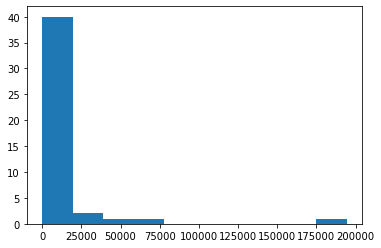

In [11]:
# ANSWER
for i in range (1000):
    s1 = (house_hold_csv.sample(50)).mean()
    print(s1)
plt.hist(s1)

###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

**ANSWER:**

###### 8.B What is mean of the distribution of sample means?

In [12]:
# ANSWER
mean1 = s1/50
mean1

Total Household Income                           3885.2840
Total Food Expenditure                           1551.5984
Agricultural Household indicator                    0.0064
Bread and Cereals Expenditure                     485.3824
Total Rice Expenditure                            371.2680
Meat Expenditure                                  183.7652
Total Fish and  marine products Expenditure       196.1052
Fruit Expenditure                                  42.7996
Vegetables Expenditure                             89.5824
Restaurant and hotels Expenditure                 275.6720
Alcoholic Beverages Expenditure                    27.6852
Tobacco Expenditure                                48.8736
Clothing, Footwear and Other Wear Expenditure      75.6708
Housing and water Expenditure                     667.8624
Imputed House Rental Value                        388.0800
Medical Care Expenditure                           72.3504
Transportation Expenditure                        172.63

**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**

In [ ]:
#Yes